# EventTree Exploratory Data Analysis

This notebook contains EDA for single_rho root data.

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot

pd.pandas.set_option('display.max_columns', None)

REPO_PATH = Path().absolute().parent.parent
DATA_PATH = REPO_PATH / "pnet_data/singlerho"

events_folder = [fn.name for fn in DATA_PATH.iterdir()][0]
file_chunks = [fn.name for fn in (DATA_PATH / events_folder).iterdir()]

print(f"Found {len(file_chunks)} chunks")

Found 42 chunks


In [2]:
chunk_keys_num = list()
for i, chunk_name in enumerate(file_chunks):
    chunk_data = uproot.open(DATA_PATH / events_folder / chunk_name)
    chunk_keys_num.append(len(list(chunk_data.keys())))
    print(f"Chunk {i=}; existing keys: {chunk_data.keys()}")

print(
    f"The distribution of keys per event is the following: [value, count]\n\n{np.array(np.unique(chunk_keys_num, return_counts=True)).T}"
)

Chunk i=0; existing keys: ['EventTree;1', 'ClusterTree;1']
Chunk i=1; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=2; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=3; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=4; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=5; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=6; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=7; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=8; existing keys: ['EventTree;1', 'ClusterTree;1']
Chunk i=9; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=10; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=11; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=12; existing keys: ['EventTree;2', 'EventTree;1', 'ClusterTree;1']
Chunk i=13; existing keys: ['EventTree;1', 'ClusterTree;1']
Chunk

In [3]:
chunk_data.classnames()

{'EventTree;2': 'TTree', 'EventTree;1': 'TTree', 'ClusterTree;1': 'TTree'}

<div class="alert alert-block alert-warning">

Notice that some events have two `EventTree` keys and one `ClusterTree`. **What does that mean?**
    
</div>

In [4]:
chunk_data['EventTree;1'], chunk_data['EventTree;2'], chunk_data['EventTree']

(<TTree 'EventTree' (121 branches) at 0x7f30800c2c70>,
 <TTree 'EventTree' (121 branches) at 0x7f30800c2670>,
 <TTree 'EventTree' (121 branches) at 0x7f30800c2670>)

In [5]:
chunk_data['EventTree;1'], chunk_data['EventTree;2'], chunk_data[
    'ClusterTree;1']

(<TTree 'EventTree' (121 branches) at 0x7f30800c2c70>,
 <TTree 'EventTree' (121 branches) at 0x7f30800c2670>,
 <TTree 'ClusterTree' (51 branches) at 0x7f30800f9100>)

We have 121 branches (keys) per event, while 51 for each cluster.

## ClusterTree inspection

In [6]:
chunk_data["ClusterTree;1"].show()  # or .typenames()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
runNumber            | int32_t                  | AsDtype('>i4')
eventNumber          | int32_t                  | AsDtype('>i4')
truthE               | float                    | AsDtype('>f4')
truthPt              | float                    | AsDtype('>f4')
truthEta             | float                    | AsDtype('>f4')
truthPhi             | float                    | AsDtype('>f4')
clusterIndex         | int32_t                  | AsDtype('>i4')
nCluster             | int32_t                  | AsDtype('>i4')
clusterE             | float                    | AsDtype('>f4')
clusterECalib        | float                    | AsDtype('>f4')
clusterPt            | float                    | AsDtype('>f4')
clusterEta           | float                    | AsDtype('>f4')
clusterPhi           | float                    | AsDtype(

In [7]:
chunk_data["ClusterTree;1"].typenames()

{'runNumber': 'int32_t',
 'eventNumber': 'int32_t',
 'truthE': 'float',
 'truthPt': 'float',
 'truthEta': 'float',
 'truthPhi': 'float',
 'clusterIndex': 'int32_t',
 'nCluster': 'int32_t',
 'clusterE': 'float',
 'clusterECalib': 'float',
 'clusterPt': 'float',
 'clusterEta': 'float',
 'clusterPhi': 'float',
 'cluster_nCells': 'int32_t',
 'cluster_sumCellE': 'float',
 'cluster_ENG_CALIB_TOT': 'float',
 'cluster_ENG_CALIB_OUT_T': 'float',
 'cluster_ENG_CALIB_DEAD_TOT': 'float',
 'cluster_EM_PROBABILITY': 'float',
 'cluster_HAD_WEIGHT': 'float',
 'cluster_OOC_WEIGHT': 'float',
 'cluster_DM_WEIGHT': 'float',
 'cluster_CENTER_MAG': 'float',
 'cluster_FIRST_ENG_DENS': 'float',
 'cluster_CENTER_LAMBDA': 'float',
 'cluster_ISOLATION': 'float',
 'cluster_ENERGY_DigiHSTruth': 'float',
 'cluster_cell_dR_min': 'float',
 'cluster_cell_dR_max': 'float',
 'cluster_cell_dEta_min': 'float',
 'cluster_cell_dEta_max': 'float',
 'cluster_cell_dPhi_min': 'float',
 'cluster_cell_dPhi_max': 'float',
 'cluste

The third column, `interpretation`, indicates how data in the TBranch will be interpreted as an array.

In [8]:
selected_cols = [
    #     'runNumber', # always constant
    'eventNumber',
    'truthE',
    'truthPt',
    'truthEta',
    'truthPhi',
    'clusterIndex',
    'nCluster',
    'clusterE',
    'clusterECalib',
    'clusterPt',
    'clusterEta',
    'clusterPhi',
    'cluster_nCells',
    'cluster_sumCellE',
    'cluster_EM_PROBABILITY',
    'cluster_cell_dR_min',
    'cluster_cell_dR_max',
    'cluster_cell_dEta_min',
    'cluster_cell_dEta_max',
    'cluster_cell_dPhi_min',
    'cluster_cell_dPhi_max',
]

event_clusters = chunk_data["ClusterTree;1"].arrays(selected_cols,
                                                    library="pd")
print(event_clusters.shape)

(228632, 21)


In [9]:
event_clusters.head()

,eventNumber,truthE,truthPt,truthEta,truthPhi,clusterIndex,nCluster,clusterE,clusterECalib,clusterPt,clusterEta,clusterPhi,cluster_nCells,cluster_sumCellE,cluster_EM_PROBABILITY,cluster_cell_dR_min,cluster_cell_dR_max,cluster_cell_dEta_min,cluster_cell_dEta_max,cluster_cell_dPhi_min,cluster_cell_dPhi_max
0,3221919,593.925293,472.855011,0.701103,2.455705,0,2,216.183502,265.885651,173.439987,0.688389,2.468356,80,215.026794,0.001000,0.012253,0.409971,-0.011945,-0.338389,-0.002730,0.231450
1,3221919,593.925293,472.855011,0.701103,2.455705,1,2,12.907271,25.304804,10.531498,0.659669,2.402533,65,13.317369,0.003715,0.002187,0.271490,-0.000195,0.190331,0.002179,-0.193600
2,3221342,30.798634,30.445354,-0.039552,-1.265297,0,4,17.463947,19.071888,17.462889,-0.011014,-1.160346,90,17.643259,0.944153,0.002981,0.170698,0.000177,0.020037,-0.002975,-0.169518
3,3221342,30.798634,30.445354,-0.039552,-1.265297,1,4,2.635048,4.167916,2.619319,-0.109534,-1.419117,16,2.775381,0.001656,0.017526,0.189674,-0.013869,0.159534,0.010715,-0.102592
4,3221342,30.798634,30.445354,-0.039552,-1.265297,2,4,2.078773,3.868704,2.072007,-0.080795,-1.426497,30,2.404055,0.063096,0.005789,0.104231,-0.000016,-0.009380,0.005789,0.103808


Text(0.5, 1.0, 'clusterIndex full distribution')

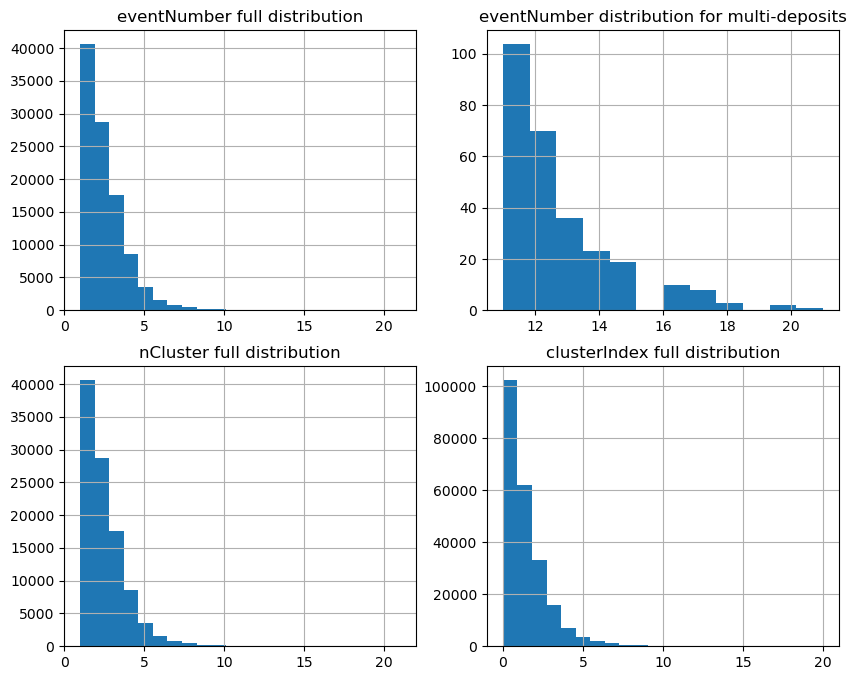

In [10]:
event_cluster_entries = event_clusters["eventNumber"].value_counts()
event_nclusters = event_clusters[["eventNumber", "nCluster"]].drop_duplicates()["nCluster"]

# plotting
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
event_cluster_entries.hist(bins=22, ax=axes[0, 0])
axes[0, 0].set_title("eventNumber full distribution")
event_cluster_entries[event_cluster_entries > 10].hist(bins=12, ax=axes[0, 1])
axes[0, 1].set_title("eventNumber distribution for multi-deposits")

event_nclusters.hist(bins=22, ax=axes[1, 0])
axes[1, 0].set_title("nCluster full distribution")
event_clusters["clusterIndex"].hist(bins=22, ax=axes[1, 1])
axes[1, 1].set_title("clusterIndex full distribution")

# event_nclusters[event_nclusters>10].hist(bins=12, ax=axes[1, 1])
# axes[1, 1].set_title("nCluster distribution for multi-deposits")

<div class="alert alert-block alert-info"> <b>NOTE</b> 
    
We have 102500 different `eventNumber` out of the 228632 rows, of which only 61837 are greater than 1. This suggests each event may generate multiple deposits, up to ~20.
</div>


### Truth quantities

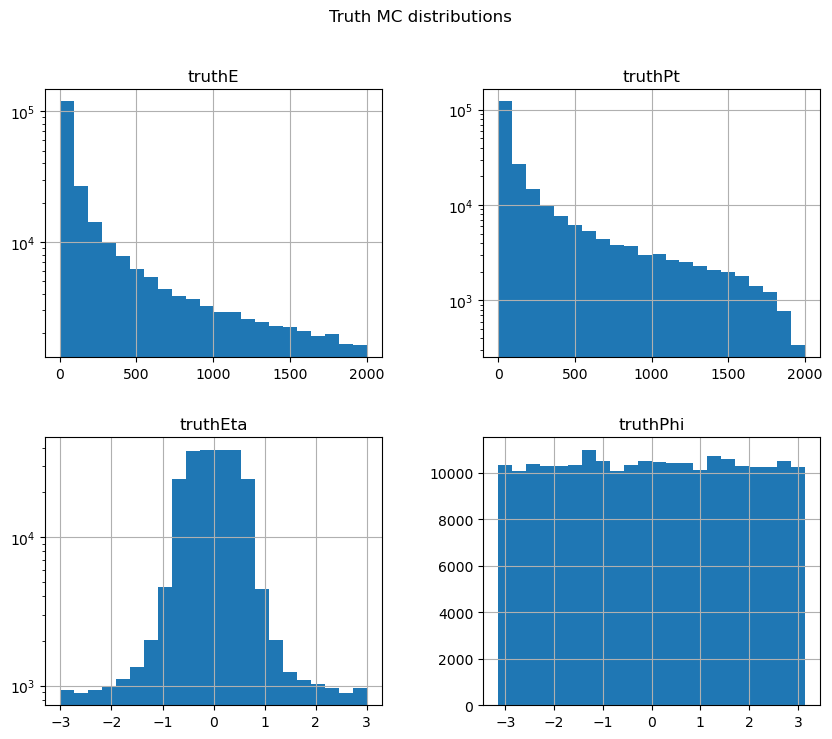

In [11]:
truth_cluster = chunk_data["ClusterTree;1"].arrays(filter_name="*truth*",
                                                   library="pd")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
_ = truth_cluster.hist(ax=axes, bins=22, log=True)  #, layout=(2,2), figsize=(10,8))
plt.yscale("linear") # only last
fig.suptitle("Truth MC distributions")
plt.show()

<div class="alert alert-block alert-info"> <b>NOTE</b> 
    
The `truth` observables have:

- exponential decay in E, Pt
- bell-shaped (Gaussian?) distribution in Eta $[-3,+3]$
- uniform distribution in Phi $[-3,+3]$
</div>


### Cluster observables

In [12]:
# cluster_cols = [
#     'clusterE',
#     'clusterECalib',
#     'clusterPt',
#     'cluster_nCells',
#     'clusterEta',
#     'clusterPhi',
# ]

# fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
# _ = event_clusters[cluster_cols].hist(
#     bins=25, ax=axes)  #, layout=(2,2), figsize=(10,8))
# fig.suptitle("Clusters observables distributions")
# plt.show()

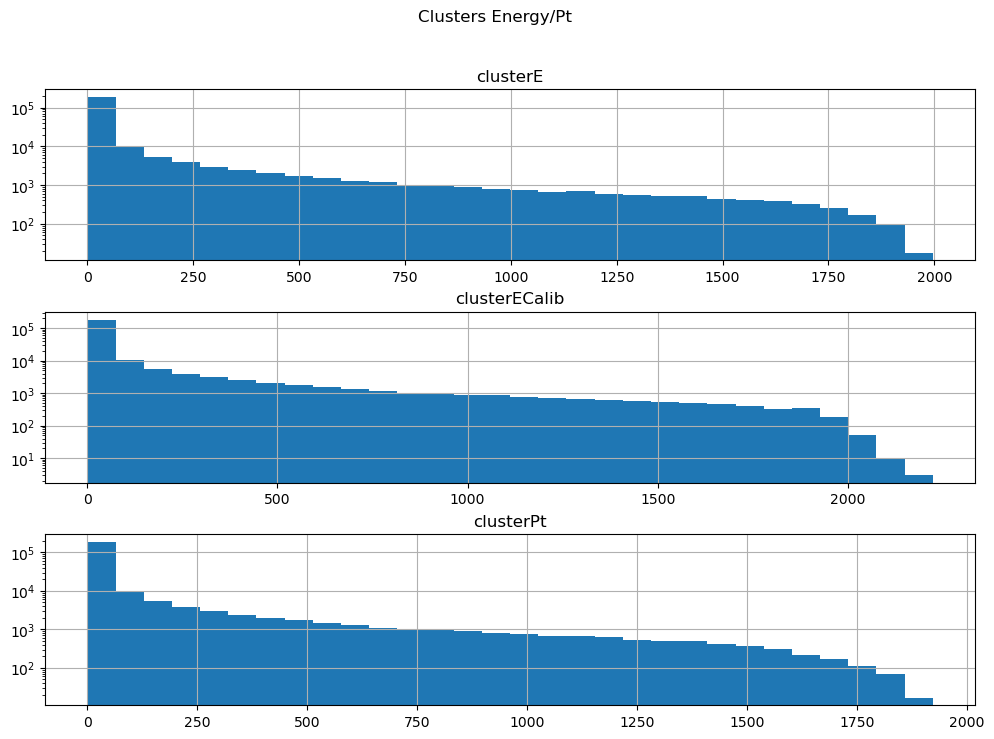

In [13]:
cluster_cols = [
    'clusterE',
    'clusterECalib',
    'clusterPt',
]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
_ = event_clusters[cluster_cols].hist(
    bins=30, ax=axes, log=True)  #, layout=(2,2), figsize=(10,8))
fig.suptitle("Clusters Energy/Pt")
plt.show()

<div class="alert alert-block alert-info">
    
Notice that the theoretical limit (upper bound) observed in the cluster energy is given by the maximum truth energy simulated. In this case, this seems valid as they both end at 2000 (apparently the unit could be GeV2 TeV).
    
For ECalib it is a bit different, in fact this may overflow the limit due to statistical uncertainties of the detector measure.
    
</div>

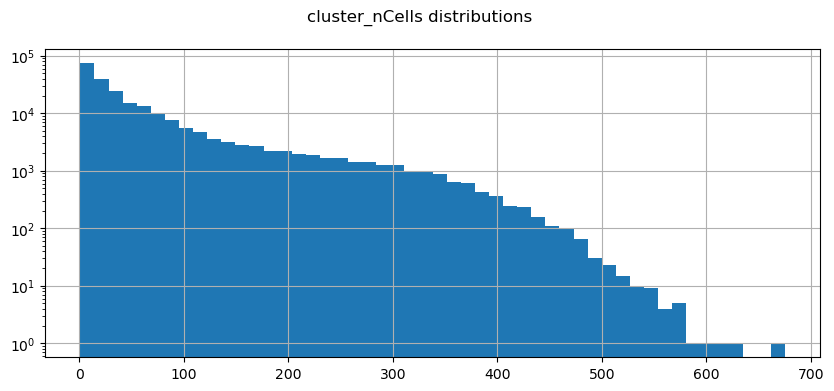

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
_ = event_clusters["cluster_nCells"].hist(
    bins=50, ax=axes, log=True)  #, layout=(2,2), figsize=(10,8))
fig.suptitle("cluster_nCells distributions")
plt.show()

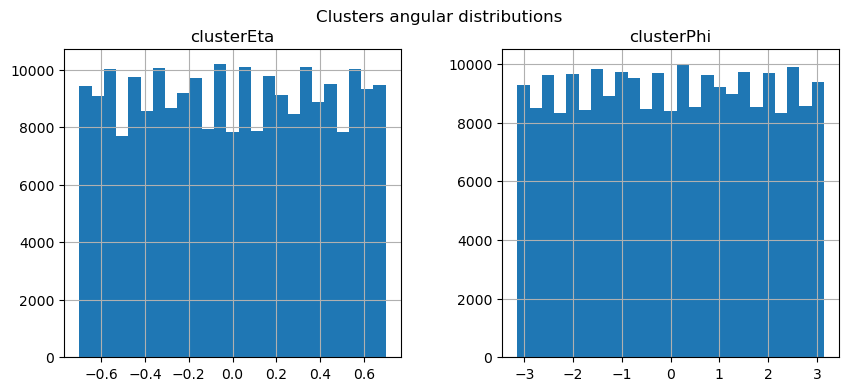

In [15]:
cluster_cols = [
    'clusterEta',
    'clusterPhi',
]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
_ = event_clusters[cluster_cols].hist(
    bins=25, ax=axes)  #, layout=(2,2), figsize=(10,8))
fig.suptitle("Clusters angular distributions")
plt.show()

### Cluster VS true comparison

Let's now compare true versus cluster distributions for energy and scattering angles.

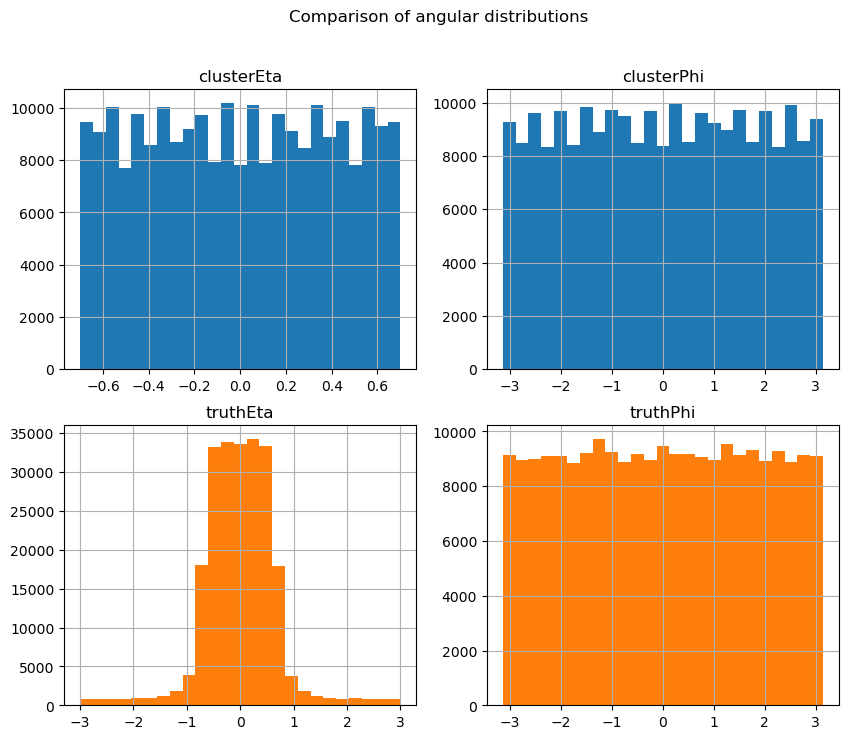

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

_ = event_clusters["clusterEta"].hist(
    bins=25, ax=axes[0, 0])  #, layout=(2,2), figsize=(10,8))
_ = axes[0, 0].set_title("clusterEta")
_ = event_clusters["clusterPhi"].hist(
    bins=25, ax=axes[0, 1])  #, layout=(2,2), figsize=(10,8))
_ = axes[0, 1].set_title("clusterPhi")

_ = truth_cluster["truthEta"].hist(
    bins=25, ax=axes[1,
                     0], color="tab:orange")  #, layout=(2,2), figsize=(10,8))
_ = axes[1, 0].set_title("truthEta")

_ = truth_cluster["truthPhi"].hist(
    bins=25, ax=axes[1,
                     1], color="tab:orange")  #, layout=(2,2), figsize=(10,8))
_ = axes[1, 1].set_title("truthPhi")
_ = fig.suptitle("Comparison of angular distributions")

<div class="alert alert-block alert-info"> <b>NOTE</b> 
    
The angular distributions are nearly flat in the clusters (top row). 
    
The generated $\eta$ distribution is instead symmetric in the range $[-3,3]$ (as opposed to $[-0.6,0.6]$ in cluster). 
    

For $\phi$, also the truth distribution is uniform, with apparently less variability.
    
    **Is this expected? Why change of shape? and range?**
    
> Yes, this is expected. In fact, in the calorimeter we mostly observe particles that "live" longer to get there, which means they started with high energy. This in turn means that they scatter at high angle (close to perpendicular), which, projected, can reach the central zone of the calorimeter (barrel). Indeed this is situated in the $[-0.6, 0.6] \eta$ domain. 

</div>


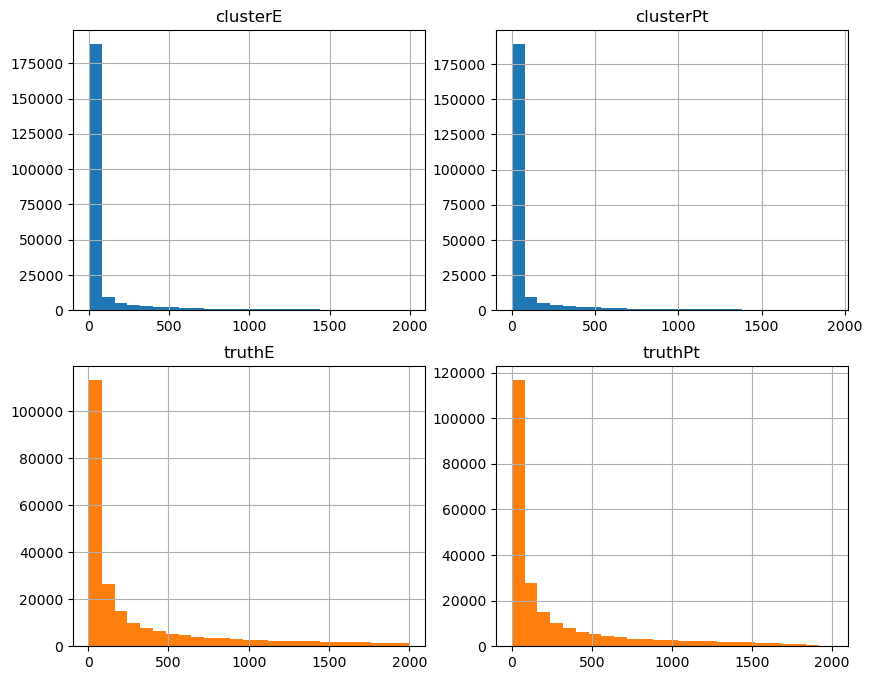

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

_ = event_clusters["clusterE"].hist(
    bins=25, ax=axes[0, 0])  #, layout=(2,2), figsize=(10,8))
_ = axes[0, 0].set_title("clusterE")
_ = event_clusters["clusterPt"].hist(
    bins=25, ax=axes[0, 1])  #, layout=(2,2), figsize=(10,8))
_ = axes[0, 1].set_title("clusterPt")

_ = truth_cluster["truthE"].hist(
    bins=25, ax=axes[1,
                     0], color="tab:orange")  #, layout=(2,2), figsize=(10,8))
_ = axes[1, 0].set_title("truthE")

_ = truth_cluster["truthPt"].hist(
    bins=25, ax=axes[1,
                     1], color="tab:orange")  #, layout=(2,2), figsize=(10,8))
_ = axes[1, 1].set_title("truthPt")

<div class="alert alert-block alert-info"> <b>NOTE</b> 
    
Cluster versus generated distribution are fairly similar, with an exponential decay. However, the clusters present a less smooth distribution skewed towards low values. 
    
    **Why?**
</div>


<div class="alert alert-block alert-warning"> <b>OPEN</b> 
    
    
**What is the key of the (table) data? i.e. how do I recognize unique rows?**
    
**Is there any relevant information to inspect more in detail?**
</div>


## EventTree inspection

In [18]:
chunk_data["EventTree"].typenames()

{'runNumber': 'int32_t',
 'eventNumber': 'int64_t',
 'lumiBlock': 'int32_t',
 'coreFlags': 'uint32_t',
 'mcEventNumber': 'int32_t',
 'mcChannelNumber': 'int32_t',
 'mcEventWeight': 'float',
 'NPV': 'int32_t',
 'actualInteractionsPerCrossing': 'float',
 'averageInteractionsPerCrossing': 'float',
 'weight_pileup': 'float',
 'correct_mu': 'float',
 'rand_run_nr': 'int32_t',
 'rand_lumiblock_nr': 'int32_t',
 'nTruthPart': 'int32_t',
 'pdgId': 'std::vector<int32_t>',
 'status': 'std::vector<int32_t>',
 'barcode': 'std::vector<int32_t>',
 'truthPartPt': 'std::vector<float>',
 'truthPartE': 'std::vector<float>',
 'truthPartMass': 'std::vector<float>',
 'truthPartEta': 'std::vector<float>',
 'truthPartPhi': 'std::vector<float>',
 'nTrack': 'int32_t',
 'trackPt': 'std::vector<float>',
 'trackP': 'std::vector<float>',
 'trackMass': 'std::vector<float>',
 'trackEta': 'std::vector<float>',
 'trackPhi': 'std::vector<float>',
 'trackNumberOfPixelHits': 'std::vector<int32_t>',
 'trackNumberOfSCTHits'

In [19]:
selected_cols = [
    #     'runNumber', # always 284500
    'eventNumber',
    #     'coreFlags', # always 0
    #     'mcEventNumber',
    #     'mcChannelNumber',
    #     'mcEventWeight', # always 1.0
    #     'NPV', # 0: 304520, 1: 15479, 2: 1 #NumberPrimaryVert
    #     'actualInteractionsPerCrossing', # always 0
    #     'averageInteractionsPerCrossing', # always 0
    #     'weight_pileup', # always 1
    #     'correct_mu', # always -1
    #     'rand_run_nr',
    #     'rand_lumiblock_nr',
    'nTruthPart',
    'pdgId',
    'status',
    #     'barcode',
    'truthPartPt',
    'truthPartE',
    'truthPartMass',
    'truthPartEta',
    'truthPartPhi',
    'nTrack',
    'trackPt',
    'trackP',
    'trackMass',
    'trackEta',
    'trackPhi',
    'trackNumberOfPixelHits',
    'trackNumberOfSCTHits',
    #     'trackNumberOfPixelDeadSensors',
    #     'trackNumberOfSCTDeadSensors',
    #     'trackNumberOfPixelSharedHits',
    #     'trackNumberOfSCTSharedHits',
    #     'trackNumberOfPixelHoles',
    #     'trackNumberOfSCTHoles',
    #     'trackNumberOfInnermostPixelLayerHits',
    #     'trackNumberOfNextToInnermostPixelLayerHits',
    #     'trackExpectInnermostPixelLayerHit',
    #     'trackExpectNextToInnermostPixelLayerHit',
    #     'trackNumberOfTRTHits',
    #     'trackNumberOfTRTOutliers',
    #     'trackChiSquared',
    #     'trackNumberDOF',
    'trackD0',
    'trackZ0',
    #     'trackEta_PreSamplerB',
    #     'trackPhi_PreSamplerB',
    #     'trackEta_PreSamplerE',
    #     'trackPhi_PreSamplerE',
    #     'trackEta_EMB1',
    #     'trackPhi_EMB1',
    #     'trackEta_EMB2',
    #     'trackPhi_EMB2',
    #     'trackEta_EMB3',
    #     'trackPhi_EMB3',
    #     'trackEta_EME1',
    #     'trackPhi_EME1',
    #     'trackEta_EME2',
    #     'trackPhi_EME2',
    #     'trackEta_EME3',
    #     'trackPhi_EME3',
    #     'trackEta_HEC0',
    #     'trackPhi_HEC0',
    #     'trackEta_HEC1',
    #     'trackPhi_HEC1',
    #     'trackEta_HEC2',
    #     'trackPhi_HEC2',
    #     'trackEta_HEC3',
    #     'trackPhi_HEC3',
    #     'trackEta_TileBar0',
    #     'trackPhi_TileBar0',
    #     'trackEta_TileBar1',
    #     'trackPhi_TileBar1',
    #     'trackEta_TileBar2',
    #     'trackPhi_TileBar2',
    #     'trackEta_TileGap1',
    #     'trackPhi_TileGap1',
    #     'trackEta_TileGap2',
    #     'trackPhi_TileGap2',
    #     'trackEta_TileGap3',
    #     'trackPhi_TileGap3',
    #     'trackEta_TileExt0',
    #     'trackPhi_TileExt0',
    #     'trackEta_TileExt1',
    #     'trackPhi_TileExt1',
    #     'trackEta_TileExt2',
    #     'trackPhi_TileExt2',
    'clusterCount',
    'nCluster',
    'clusterE',
    'clusterPt',
    'clusterEta',
    'clusterPhi',
    'cluster_nCells',
    'cluster_sumCellE',
    #     'cluster_cell_dEta',
    #     'cluster_cell_dPhi',
    #     'cluster_cell_dR_min',
    #     'cluster_cell_dR_max',
    #     'cluster_cell_dEta_min',
    #     'cluster_cell_dEta_max',
    #     'cluster_cell_dPhi_min',
    #     'cluster_cell_dPhi_max',
]

events = chunk_data["EventTree"].arrays(selected_cols, library="pd")
print(events.shape)

(320000, 27)


In [20]:
events.head()

,eventNumber,nTruthPart,pdgId,status,truthPartPt,truthPartE,truthPartMass,truthPartEta,truthPartPhi,nTrack,trackPt,trackP,trackMass,trackEta,trackPhi,trackNumberOfPixelHits,trackNumberOfSCTHits,trackD0,trackZ0,clusterCount,nCluster,clusterE,clusterPt,clusterEta,clusterPhi,cluster_nCells,cluster_sumCellE
0,3220116,2,[-213 111],[2 2],[110.4375228881836 102.18875122070312],[297.4756774902344 272.17486572265625],[0.0 0.1349765956401825],[-1.6475147008895874 -1.6355053186416626],[-3.112333297729492 -3.1157939434051514],1,[8.092719078063965],[24.80705451965332],[0.13969796895980835],[-1.785575270652771],[-3.0689988136291504],[5],[7],[-0.0026796036399900913],[61.6153564453125],0,0,[],[],[],[],[],[]
1,3221919,2,[213 111],[2 2],[472.8550109863281 154.67486572265625],[593.92529296875 195.4635772705078],[0.0 0.1349765956401825],[0.7011030912399292 0.7111505270004272],[2.455704689025879 2.4469854831695557],1,[326.7279357910156],[409.1562805175781],[0.10056809335947037],[0.6961853504180908],[2.45993709564209],[4],[10],[-0.012303376570343971],[10.345993041992188],0,2,"[216.18350219726562, 12.907271385192871]","[173.4399871826172, 10.531497955322266]","[0.6883891224861145, 0.6596693396568298]","[2.468356132507324, 2.4025328159332275]","[210, 130]","[216.1834259033203, 12.907276153564453]"
2,3221342,2,[-213 111],[2 2],[30.445354461669922 21.199703216552734],[30.798633575439453 21.20216941833496],[0.0 0.1349765956401825],[-0.03955245390534401 -0.013858667574822903],[-1.2652974128723145 -1.1707838773727417],1,[9.670117378234863],[9.713912963867188],[0.1395721286535263],[-0.095136359333992],[-1.4760774374008179],[4],[9],[-0.012635065242648125],[8.548205375671387],2,4,"[17.463947296142578, 2.635047674179077, 2.0787...","[17.462888717651367, 2.619318962097168, 2.0720...","[-0.011014442890882492, -0.10953377187252045, ...","[-1.1603456735610962, -1.4191169738769531, -1....","[111, 36, 59, 12]","[17.463947296142578, 2.6350479125976562, 2.078..."
3,3220180,2,[-213 111],[2 2],[187.78460693359375 161.32720947265625],[732.2901000976562 625.2473754882812],[0.0 0.1349766105413437],[-2.037158966064453 -2.0307846069335938],[1.4612504243850708 1.4594742059707642],1,[25.168373107910156],[101.80282592773438],[0.14291200041770935],[-2.074954032897949],[1.472256064414978],[6],[10],[-0.026322731748223305],[-6.245691299438477],6,0,[],[],[],[],[],[]
4,3220742,2,[-213 111],[2 2],[158.3241424560547 114.17950439453125],[203.46556091308594 147.76568603515625],[0.0 0.1349765956401825],[0.7380838990211487 0.7493535876274109],[-2.636500358581543 -2.6399805545806885],1,[43.914695739746094],[55.416770935058594],[0.13921426236629486],[0.7088329195976257],[-2.6274502277374268],[4],[10],[0.023520980030298233],[-22.891508102416992],6,1,[34.936763763427734],[28.516544342041016],[0.6590378284454346],[-2.6066577434539795],[131],[34.9367561340332]


In [21]:
import awkward as ak

events_exploded = ak.to_dataframe(chunk_data["EventTree"].arrays(selected_cols,
                                                                 library="ak"))
print(events_exploded.shape)

(99968, 27)


In [22]:
events.head()

,eventNumber,nTruthPart,pdgId,status,truthPartPt,truthPartE,truthPartMass,truthPartEta,truthPartPhi,nTrack,trackPt,trackP,trackMass,trackEta,trackPhi,trackNumberOfPixelHits,trackNumberOfSCTHits,trackD0,trackZ0,clusterCount,nCluster,clusterE,clusterPt,clusterEta,clusterPhi,cluster_nCells,cluster_sumCellE
0,3220116,2,[-213 111],[2 2],[110.4375228881836 102.18875122070312],[297.4756774902344 272.17486572265625],[0.0 0.1349765956401825],[-1.6475147008895874 -1.6355053186416626],[-3.112333297729492 -3.1157939434051514],1,[8.092719078063965],[24.80705451965332],[0.13969796895980835],[-1.785575270652771],[-3.0689988136291504],[5],[7],[-0.0026796036399900913],[61.6153564453125],0,0,[],[],[],[],[],[]
1,3221919,2,[213 111],[2 2],[472.8550109863281 154.67486572265625],[593.92529296875 195.4635772705078],[0.0 0.1349765956401825],[0.7011030912399292 0.7111505270004272],[2.455704689025879 2.4469854831695557],1,[326.7279357910156],[409.1562805175781],[0.10056809335947037],[0.6961853504180908],[2.45993709564209],[4],[10],[-0.012303376570343971],[10.345993041992188],0,2,"[216.18350219726562, 12.907271385192871]","[173.4399871826172, 10.531497955322266]","[0.6883891224861145, 0.6596693396568298]","[2.468356132507324, 2.4025328159332275]","[210, 130]","[216.1834259033203, 12.907276153564453]"
2,3221342,2,[-213 111],[2 2],[30.445354461669922 21.199703216552734],[30.798633575439453 21.20216941833496],[0.0 0.1349765956401825],[-0.03955245390534401 -0.013858667574822903],[-1.2652974128723145 -1.1707838773727417],1,[9.670117378234863],[9.713912963867188],[0.1395721286535263],[-0.095136359333992],[-1.4760774374008179],[4],[9],[-0.012635065242648125],[8.548205375671387],2,4,"[17.463947296142578, 2.635047674179077, 2.0787...","[17.462888717651367, 2.619318962097168, 2.0720...","[-0.011014442890882492, -0.10953377187252045, ...","[-1.1603456735610962, -1.4191169738769531, -1....","[111, 36, 59, 12]","[17.463947296142578, 2.6350479125976562, 2.078..."
3,3220180,2,[-213 111],[2 2],[187.78460693359375 161.32720947265625],[732.2901000976562 625.2473754882812],[0.0 0.1349766105413437],[-2.037158966064453 -2.0307846069335938],[1.4612504243850708 1.4594742059707642],1,[25.168373107910156],[101.80282592773438],[0.14291200041770935],[-2.074954032897949],[1.472256064414978],[6],[10],[-0.026322731748223305],[-6.245691299438477],6,0,[],[],[],[],[],[]
4,3220742,2,[-213 111],[2 2],[158.3241424560547 114.17950439453125],[203.46556091308594 147.76568603515625],[0.0 0.1349765956401825],[0.7380838990211487 0.7493535876274109],[-2.636500358581543 -2.6399805545806885],1,[43.914695739746094],[55.416770935058594],[0.13921426236629486],[0.7088329195976257],[-2.6274502277374268],[4],[10],[0.023520980030298233],[-22.891508102416992],6,1,[34.936763763427734],[28.516544342041016],[0.6590378284454346],[-2.6066577434539795],[131],[34.9367561340332]


In [23]:
events_exploded.loc[4]

,eventNumber,nTruthPart,pdgId,status,truthPartPt,truthPartE,truthPartMass,truthPartEta,truthPartPhi,nTrack,trackPt,trackP,trackMass,trackEta,trackPhi,trackNumberOfPixelHits,trackNumberOfSCTHits,trackD0,trackZ0,clusterCount,nCluster,clusterE,clusterPt,clusterEta,clusterPhi,cluster_nCells,cluster_sumCellE
subentry,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3220742,2,-213,2,158.324142,203.465561,0.0,0.738084,-2.6365,1,43.914696,55.416771,0.139214,0.708833,-2.62745,4,10,0.023521,-22.891508,6,1,34.936764,28.516544,0.659038,-2.606658,131,34.936756


In [24]:
events_exploded.head(53)  #.iloc[40:53]

,,eventNumber,nTruthPart,pdgId,status,truthPartPt,truthPartE,truthPartMass,truthPartEta,truthPartPhi,nTrack,trackPt,trackP,trackMass,trackEta,trackPhi,trackNumberOfPixelHits,trackNumberOfSCTHits,trackD0,trackZ0,clusterCount,nCluster,clusterE,clusterPt,clusterEta,clusterPhi,cluster_nCells,cluster_sumCellE
entry,subentry,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3221919,2,213,2,472.855011,593.925293,0.000000,0.701103,2.455705,1,326.727936,409.156281,0.100568,0.696185,2.459937,4,10,-0.012303,10.345993,0,2,216.183502,173.439987,0.688389,2.468356,210,216.183426
2,0,3221342,2,-213,2,30.445354,30.798634,0.000000,-0.039552,-1.265297,1,9.670117,9.713913,0.139572,-0.095136,-1.476077,4,9,-0.012635,8.548205,2,4,17.463947,17.462889,-0.011014,-1.160346,111,17.463947
4,0,3220742,2,-213,2,158.324142,203.465561,0.000000,0.738084,-2.636500,1,43.914696,55.416771,0.139214,0.708833,-2.627450,4,10,0.023521,-22.891508,6,1,34.936764,28.516544,0.659038,-2.606658,131,34.936756
12,0,3221778,2,-213,2,194.866211,202.292252,0.000000,0.274586,-1.050131,1,6.396023,6.501004,0.139573,0.180936,-1.092439,4,9,0.026805,59.299500,7,2,191.159317,182.187195,0.312563,-1.045918,166,191.159317
14,0,3220395,2,213,2,359.714417,420.045685,0.000000,0.571348,-2.866143,1,320.188934,374.355988,0.135996,0.573771,-2.866218,4,6,0.002859,39.159737,9,1,379.536194,324.089172,0.576920,-2.885757,221,379.536072
27,0,3220124,2,-213,2,493.602570,1194.665161,0.000000,-1.531334,2.152324,1,124.528366,302.609985,0.178821,-1.535749,2.157593,4,8,0.009014,-40.779568,13,1,0.076710,0.075707,0.162584,-0.999740,11,0.076710
28,0,3220776,2,-213,2,3.121455,6.274782,0.000000,0.714979,2.562861,2,3.480329,3.490836,0.139570,0.077686,2.034997,4,8,-0.049183,-3.481299,14,1,1.778399,1.775970,0.052298,2.178747,33,1.778399
31,0,3221470,2,-213,2,164.792145,169.348068,0.000000,0.234479,-0.847588,1,16.587807,17.018169,0.139613,0.227302,-0.830584,4,10,-0.000833,24.380018,15,1,158.073334,153.408539,0.245987,-0.844817,236,158.073288
34,0,3221146,2,-213,2,1158.524048,1175.248535,0.000000,0.169706,-1.515540,1,292.257782,296.565247,0.124359,0.171479,-1.518008,4,8,0.021526,14.666152,16,2,1099.247070,1082.477295,0.175797,-1.517502,502,1099.247437


<div class="alert alert-block alert-warning"> <b>OPEN</b> 
    
**What is the key of the (table) data? i.e. how do I recognize unique rows?**
    
**How do I transform `EventTree` into pandas df? see difference in exploded data**
    
**How to explode dataset? I suspect the problem is with the awkward format of `pdgId` and `status` entries
</div>


### try self-exploding post conversion to pandas

In [25]:
# direct solution
events.explode(
    ["pdgId", "status"]
)  # does not work: columns stay as single row with list entries instead of multi-rows

,eventNumber,nTruthPart,pdgId,status,truthPartPt,truthPartE,truthPartMass,truthPartEta,truthPartPhi,nTrack,trackPt,trackP,trackMass,trackEta,trackPhi,trackNumberOfPixelHits,trackNumberOfSCTHits,trackD0,trackZ0,clusterCount,nCluster,clusterE,clusterPt,clusterEta,clusterPhi,cluster_nCells,cluster_sumCellE
0,3220116,2,[-213 111],[2 2],[110.4375228881836 102.18875122070312],[297.4756774902344 272.17486572265625],[0.0 0.1349765956401825],[-1.6475147008895874 -1.6355053186416626],[-3.112333297729492 -3.1157939434051514],1,[8.092719078063965],[24.80705451965332],[0.13969796895980835],[-1.785575270652771],[-3.0689988136291504],[5],[7],[-0.0026796036399900913],[61.6153564453125],0,0,[],[],[],[],[],[]
1,3221919,2,[213 111],[2 2],[472.8550109863281 154.67486572265625],[593.92529296875 195.4635772705078],[0.0 0.1349765956401825],[0.7011030912399292 0.7111505270004272],[2.455704689025879 2.4469854831695557],1,[326.7279357910156],[409.1562805175781],[0.10056809335947037],[0.6961853504180908],[2.45993709564209],[4],[10],[-0.012303376570343971],[10.345993041992188],0,2,"[216.18350219726562, 12.907271385192871]","[173.4399871826172, 10.531497955322266]","[0.6883891224861145, 0.6596693396568298]","[2.468356132507324, 2.4025328159332275]","[210, 130]","[216.1834259033203, 12.907276153564453]"
2,3221342,2,[-213 111],[2 2],[30.445354461669922 21.199703216552734],[30.798633575439453 21.20216941833496],[0.0 0.1349765956401825],[-0.03955245390534401 -0.013858667574822903],[-1.2652974128723145 -1.1707838773727417],1,[9.670117378234863],[9.713912963867188],[0.1395721286535263],[-0.095136359333992],[-1.4760774374008179],[4],[9],[-0.012635065242648125],[8.548205375671387],2,4,"[17.463947296142578, 2.635047674179077, 2.0787...","[17.462888717651367, 2.619318962097168, 2.0720...","[-0.011014442890882492, -0.10953377187252045, ...","[-1.1603456735610962, -1.4191169738769531, -1....","[111, 36, 59, 12]","[17.463947296142578, 2.6350479125976562, 2.078..."
3,3220180,2,[-213 111],[2 2],[187.78460693359375 161.32720947265625],[732.2901000976562 625.2473754882812],[0.0 0.1349766105413437],[-2.037158966064453 -2.0307846069335938],[1.4612504243850708 1.4594742059707642],1,[25.168373107910156],[101.80282592773438],[0.14291200041770935],[-2.074954032897949],[1.472256064414978],[6],[10],[-0.026322731748223305],[-6.245691299438477],6,0,[],[],[],[],[],[]
4,3220742,2,[-213 111],[2 2],[158.3241424560547 114.17950439453125],[203.46556091308594 147.76568603515625],[0.0 0.1349765956401825],[0.7380838990211487 0.7493535876274109],[-2.636500358581543 -2.6399805545806885],1,[43.914695739746094],[55.416770935058594],[0.13921426236629486],[0.7088329195976257],[-2.6274502277374268],[4],[10],[0.023520980030298233],[-22.891508102416992],6,1,[34.936763763427734],[28.516544342041016],[0.6590378284454346],[-2.6066577434539795],[131],[34.9367561340332]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,4677424,2,[-213 111],[2 2],[1.8791214227676392 0.9265167117118835],[9.133286476135254 5.206141948699951],[0.0 0.1349765956401825],[-2.1416101455688477 -2.410953998565674],[-1.9184783697128296 1.5116448402404785],1,[2.3580596446990967],[3.3012123107910156],[0.13957159221172333],[-0.8669840097427368],[-1.84126615524292],[4],[10],[-0.004286415874958038],[-1.8335986137390137],228626,0,[],[],[],[],[],[]
319996,4677589,2,[213 111],[2 2],[35.97102737426758 34.82418441772461],[96.83651733398438 90.64117431640625],[0.0 0.1349765956401825],[-1.6456140279769897 -1.6106120347976685],[1.0247589349746704 1.025191307067871],2,"[1.1635428667068481, 8.71579360961914]","[6.279165744781494, 22.720483779907227]","[0.139560729265213, 0.1395624577999115]","[-2.370217800140381, -1.612274169921875]","[1.0116324424743652, 1.009166955947876]","[5, 0]","[7, 10]","[0.023124340921640396, 3.3265159130096436]","[14.134146690368652, 16.724018096923828]",228626,0,[],[],[],[],[],[]
319997,4676250,2,[-213 111],[2 2],[472.55279541015625 425.5263977050781],[

In [26]:
# should work like this
df = pd.DataFrame({
    'A': ['x1', 'x2', 'x3', 'x4'],
    'B': [['v1', 'v2'], ['v3', 'v4'], ['v5', 'v6'], ['v7', 'v8']],
    'C': [['c1', 'c2'], ['c3', 'c4'], ['c5', 'c6'], ['c7', 'c8']],
})
print("initial df:")
print(df)
print("\n\nresult:")
df.explode(['B', 'C']).reset_index(drop=True)

initial df:
    A         B         C
0  x1  [v1, v2]  [c1, c2]
1  x2  [v3, v4]  [c3, c4]
2  x3  [v5, v6]  [c5, c6]
3  x4  [v7, v8]  [c7, c8]


result:


,A,B,C
0,x1,v1,c1
1,x1,v2,c2
2,x2,v3,c3
3,x2,v4,c4
4,x3,v5,c5
5,x3,v6,c6
6,x4,v7,c7
7,x4,v8,c8


### try inspecting cell formats

In [27]:
type(events.pdgId[0]), type(events.status[0])

(awkward.highlevel.Array, awkward.highlevel.Array)

The entries are in `awkward.highlevel.Array` format, which may be responsible for the failure in exploding. First attempt is to convert to list format as in the example. Let's do it on a toy dataset for simplicity.

First, use `toy_df` build from scratch with lists:

In [28]:
toy_df = pd.DataFrame({
    'eventNumber': [1, 2, 3, 4],
    'pdgId': [[-213, 111], [213, 111], [-213, 111], [-213, 111]],
    'status': [[2, 2], [2, 2], [2, 1], [1, 2]],
})
print("initial toy_df:")
print(toy_df)
print("\n\nresult:")
toy_df.explode(['pdgId', 'status'])  #.reset_index(drop=True)

initial toy_df:
   eventNumber        pdgId  status
0            1  [-213, 111]  [2, 2]
1            2   [213, 111]  [2, 2]
2            3  [-213, 111]  [2, 1]
3            4  [-213, 111]  [1, 2]


result:


,eventNumber,pdgId,status
0,1,-213,2
0,1,111,2
1,2,213,2
1,2,111,2
2,3,-213,2
2,3,111,1
3,4,-213,1
3,4,111,2


In [29]:
toy_df.dtypes

eventNumber     int64
pdgId          object
status         object
dtype: object

The toy works, and it has exploded columns in **list format**. 

Let's now try with `toy_df_real` subsampled from real data:

In [30]:
toy_df_real = events[["eventNumber", "pdgId", "status"]].iloc[:5]
toy_df_real

,eventNumber,pdgId,status
0,3220116,[-213 111],[2 2]
1,3221919,[213 111],[2 2]
2,3221342,[-213 111],[2 2]
3,3220180,[-213 111],[2 2]
4,3220742,[-213 111],[2 2]


In [31]:
toy_df_real.explode(['pdgId', 'status'])  #.reset_index(drop=True)

,eventNumber,pdgId,status
0,3220116,[-213 111],[2 2]
1,3221919,[213 111],[2 2]
2,3221342,[-213 111],[2 2]
3,3220180,[-213 111],[2 2]
4,3220742,[-213 111],[2 2]


In [32]:
toy_df_real.dtypes

eventNumber      int64
pdgId          awkward
status         awkward
dtype: object

Again, it doesn't work with awkward arrays. Let's try converting to lists:

In [33]:
# toy_df_real.astype({'pdgId': np.object_, 'status': np.object_})
toy_df_real[["pdgId", "status"]] = toy_df_real[["pdgId", "status"]].map(
    lambda x: ak.to_list(x)
)  # from awkward documentation: https://awkward-array.org/doc/main/user-guide/how-to-convert-numpy.html#from-awkward-to-numpy

toy_df_real.dtypes

eventNumber     int64
pdgId          object
status         object
dtype: object

In [34]:
toy_df_real  # expected format

,eventNumber,pdgId,status
0,3220116,"[-213, 111]","[2, 2]"
1,3221919,"[213, 111]","[2, 2]"
2,3221342,"[-213, 111]","[2, 2]"
3,3220180,"[-213, 111]","[2, 2]"
4,3220742,"[-213, 111]","[2, 2]"


In [35]:
type(toy_df_real.pdgId[0]), type(toy_df_real.status[0])  # again as expected

(list, list)

In [36]:
# try exploding casted dataframe
toy_df_real.explode(['pdgId', 'status'])  #.reset_index(drop=True)

,eventNumber,pdgId,status
0,3220116,-213,2
0,3220116,111,2
1,3221919,213,2
1,3221919,111,2
2,3221342,-213,2
2,3221342,111,2
3,3220180,-213,2
3,3220180,111,2
4,3220742,-213,2
4,3220742,111,2


#### Cast data

In [37]:
# now try on real data directly!
events_casted = events.copy()

events_casted[["pdgId",
               "status"]] = events_casted[["pdgId", "status"
                                           ]].map(lambda x: ak.to_list(x))
events_casted.explode(["pdgId", "status"])

,eventNumber,nTruthPart,pdgId,status,truthPartPt,truthPartE,truthPartMass,truthPartEta,truthPartPhi,nTrack,trackPt,trackP,trackMass,trackEta,trackPhi,trackNumberOfPixelHits,trackNumberOfSCTHits,trackD0,trackZ0,clusterCount,nCluster,clusterE,clusterPt,clusterEta,clusterPhi,cluster_nCells,cluster_sumCellE
0,3220116,2,-213,2,[110.4375228881836 102.18875122070312],[297.4756774902344 272.17486572265625],[0.0 0.1349765956401825],[-1.6475147008895874 -1.6355053186416626],[-3.112333297729492 -3.1157939434051514],1,[8.092719078063965],[24.80705451965332],[0.13969796895980835],[-1.785575270652771],[-3.0689988136291504],[5],[7],[-0.0026796036399900913],[61.6153564453125],0,0,[],[],[],[],[],[]
0,3220116,2,111,2,[110.4375228881836 102.18875122070312],[297.4756774902344 272.17486572265625],[0.0 0.1349765956401825],[-1.6475147008895874 -1.6355053186416626],[-3.112333297729492 -3.1157939434051514],1,[8.092719078063965],[24.80705451965332],[0.13969796895980835],[-1.785575270652771],[-3.0689988136291504],[5],[7],[-0.0026796036399900913],[61.6153564453125],0,0,[],[],[],[],[],[]
1,3221919,2,213,2,[472.8550109863281 154.67486572265625],[593.92529296875 195.4635772705078],[0.0 0.1349765956401825],[0.7011030912399292 0.7111505270004272],[2.455704689025879 2.4469854831695557],1,[326.7279357910156],[409.1562805175781],[0.10056809335947037],[0.6961853504180908],[2.45993709564209],[4],[10],[-0.012303376570343971],[10.345993041992188],0,2,"[216.18350219726562, 12.907271385192871]","[173.4399871826172, 10.531497955322266]","[0.6883891224861145, 0.6596693396568298]","[2.468356132507324, 2.4025328159332275]","[210, 130]","[216.1834259033203, 12.907276153564453]"
1,3221919,2,111,2,[472.8550109863281 154.67486572265625],[593.92529296875 195.4635772705078],[0.0 0.1349765956401825],[0.7011030912399292 0.7111505270004272],[2.455704689025879 2.4469854831695557],1,[326.7279357910156],[409.1562805175781],[0.10056809335947037],[0.6961853504180908],[2.45993709564209],[4],[10],[-0.012303376570343971],[10.345993041992188],0,2,"[216.18350219726562, 12.907271385192871]","[173.4399871826172, 10.531497955322266]","[0.6883891224861145, 0.6596693396568298]","[2.468356132507324, 2.4025328159332275]","[210, 130]","[216.1834259033203, 12.907276153564453]"
2,3221342,2,-213,2,[30.445354461669922 21.199703216552734],[30.798633575439453 21.20216941833496],[0.0 0.1349765956401825],[-0.03955245390534401 -0.013858667574822903],[-1.2652974128723145 -1.1707838773727417],1,[9.670117378234863],[9.713912963867188],[0.1395721286535263],[-0.095136359333992],[-1.4760774374008179],[4],[9],[-0.012635065242648125],[8.548205375671387],2,4,"[17.463947296142578, 2.635047674179077, 2.0787...","[17.462888717651367, 2.619318962097168, 2.0720...","[-0.011014442890882492, -0.10953377187252045, ...","[-1.1603456735610962, -1.4191169738769531, -1....","[111, 36, 59, 12]","[17.463947296142578, 2.6350479125976562, 2.078..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319997,4676250,2,111,2,[472.55279541015625 425.5263977050781],[513.5120239257812 462.0832214355469],[0.0 0.1349765956401825],[-0.41334667801856995 -0.41159912943840027],[-2.7076213359832764 -2.7093515396118164],1,[47.19434356689453],[51.593082427978516],[0.13940490782260895],[-0.4284667670726776],[-2.69193696975708],[4],[7],[-0.01222887635231018],[32.95328140258789],228626,2,"[476.4754333496094, 22.876317977905273]","[442.3148193359375, 21.0115966796875]","[-0.39053115248680115, -0.4182458817958832]","[-2.7066757678985596, -2.674931526184082]","[234, 227]","[476.47515869140625, 22.876310348510742]"
319998,4677304,2,-213,2,[908.9779663085938 759.3287963867188],[1227.90771484375 1024.38671875],[0.0 0.1349765956401825],[-0.8149461150169373 -0.8129724860191345],[2.0390701293945312 2.039515733718872],1,[126.25921630859375],[171.74270629882812],[0.13854597508907318],[-0.8251963257789612],[2.0366461277008057],[4],[8],[0.004070840775966644],[73.96022033691406],228628,1,[1.8004097938537

In [38]:
events_casted.dtypes

eventNumber                 int64
nTruthPart                  int32
pdgId                      object
status                     object
truthPartPt               awkward
truthPartE                awkward
truthPartMass             awkward
truthPartEta              awkward
truthPartPhi              awkward
nTrack                      int32
trackPt                   awkward
trackP                    awkward
trackMass                 awkward
trackEta                  awkward
trackPhi                  awkward
trackNumberOfPixelHits    awkward
trackNumberOfSCTHits      awkward
trackD0                   awkward
trackZ0                   awkward
clusterCount                int64
nCluster                    int32
clusterE                  awkward
clusterPt                 awkward
clusterEta                awkward
clusterPhi                awkward
cluster_nCells            awkward
cluster_sumCellE          awkward
dtype: object

<div class="alert alert-block alert-success">

<b>It works!!</b>
    
    Real data contains multiple `awkward.Array` columns, so we need to cast all of them before exploding.
</div>

In [39]:
# restart from beginning to i) cast and ii) explode
events_casted = events.copy()

to_cast_cols = [
    col for col in events_casted.columns
    if isinstance(events_casted[col][0], ak.Array)
]

events_casted[to_cast_cols] = events_casted[to_cast_cols].map(
    lambda x: ak.to_list(x))


to_cast_cols

['pdgId',
 'status',
 'truthPartPt',
 'truthPartE',
 'truthPartMass',
 'truthPartEta',
 'truthPartPhi',
 'trackPt',
 'trackP',
 'trackMass',
 'trackEta',
 'trackPhi',
 'trackNumberOfPixelHits',
 'trackNumberOfSCTHits',
 'trackD0',
 'trackZ0',
 'clusterE',
 'clusterPt',
 'clusterEta',
 'clusterPhi',
 'cluster_nCells',
 'cluster_sumCellE']

In [40]:
try:
    events_exploded = events_casted.explode(to_cast_cols)
    events_exploded.head(20)
except ValueError as e:
    print(f"Cannot explode data:\n\n{e=}")

Cannot explode data:

e=ValueError('columns must have matching element counts')


#### Check array lengths

In [41]:
events_casted[to_cast_cols].iloc[0].map(lambda x: len(x))

pdgId                     2
status                    2
truthPartPt               2
truthPartE                2
truthPartMass             2
truthPartEta              2
truthPartPhi              2
trackPt                   1
trackP                    1
trackMass                 1
trackEta                  1
trackPhi                  1
trackNumberOfPixelHits    1
trackNumberOfSCTHits      1
trackD0                   1
trackZ0                   1
clusterE                  0
clusterPt                 0
clusterEta                0
clusterPhi                0
cluster_nCells            0
cluster_sumCellE          0
Name: 0, dtype: int64

In [42]:
events_casted[to_cast_cols].iloc[100].map(lambda x: len(x))

pdgId                     2
status                    2
truthPartPt               2
truthPartE                2
truthPartMass             2
truthPartEta              2
truthPartPhi              2
trackPt                   3
trackP                    3
trackMass                 3
trackEta                  3
trackPhi                  3
trackNumberOfPixelHits    3
trackNumberOfSCTHits      3
trackD0                   3
trackZ0                   3
clusterE                  0
clusterPt                 0
clusterEta                0
clusterPhi                0
cluster_nCells            0
cluster_sumCellE          0
Name: 100, dtype: int64

In [43]:
count = 0
for i in range(len(events_casted)):
    # check length of clusters columns
    if events_casted[to_cast_cols].iloc[i].map(
            lambda x: len(x))[-6:].sum() > 0:
        print(i)
        print(events_casted[to_cast_cols].iloc[i].map(lambda x: len(x)),
              "\n\n")
        count += 1
#         print(f"{count=}")
    if count == 5:
        break

1
pdgId                     2
status                    2
truthPartPt               2
truthPartE                2
truthPartMass             2
truthPartEta              2
truthPartPhi              2
trackPt                   1
trackP                    1
trackMass                 1
trackEta                  1
trackPhi                  1
trackNumberOfPixelHits    1
trackNumberOfSCTHits      1
trackD0                   1
trackZ0                   1
clusterE                  2
clusterPt                 2
clusterEta                2
clusterPhi                2
cluster_nCells            2
cluster_sumCellE          2
Name: 1, dtype: int64 


2
pdgId                     2
status                    2
truthPartPt               2
truthPartE                2
truthPartMass             2
truthPartEta              2
truthPartPhi              2
trackPt                   1
trackP                    1
trackMass                 1
trackEta                  1
trackPhi                  1
trackNumberOfPixelH

<div class="alert alert-block alert-danger">

Unfortunately it doesn't work because not all columns have the same awkward.Array length **:(**
    
In particular, **truth** information (in particular `pdgId` and `status`) should always have length 2, while track and cluster info is varying (from 0 to even more than 2).
    
    **This is an open point on how to deal with these data in python**
    
    **This problem affect later exploration**
    
    **A possible solution is to consider *truth*, *track* and *cluster* information separately as they should have same within-group length**
</div>

### eventNumber, nTruthPart, nTrack, nCluster and clusterCount distributions

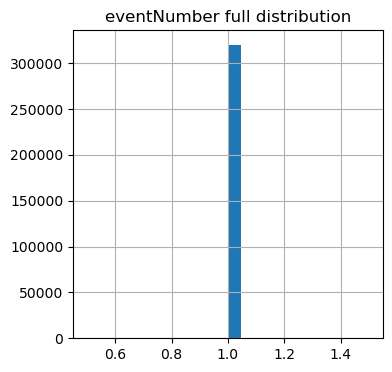

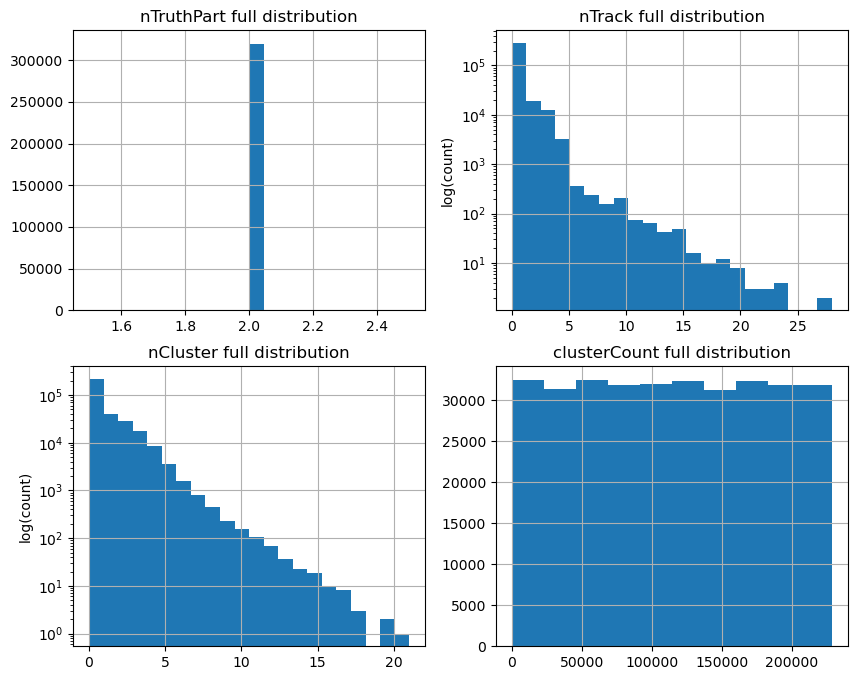

In [44]:
events_entries = events["eventNumber"].value_counts()
events_nclusters = events["nCluster"].value_counts()

# plotting
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
_ = events_entries.hist(bins=22, ax=ax)
ax.set_title(
    "eventNumber full distribution")  # one row per event --> not exploded

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
_ = events["nTruthPart"].hist(bins=22, ax=axes[0, 0])
axes[0, 0].set_title("nTruthPart full distribution")
_ = events["nTrack"].hist(bins=22, ax=axes[0, 1], log=True)
axes[0, 1].set_title("nTrack full distribution")
axes[0, 1].set_ylabel("log(count)")

events["nCluster"].hist(bins=22, ax=axes[1, 0], log=True)
axes[1, 0].set_title("nCluster full distribution")
axes[1, 0].set_ylabel("log(count)")
events["clusterCount"].hist(ax=axes[1, 1])
axes[1, 1].set_title("clusterCount full distribution")
# events_entries[events_entries > 10].hist(bins=12, ax=axes[0, 1])
# axes[0, 1].set_title("eventNumber distribution for multi-deposits")

plt.show()

<div class="alert alert-block alert-info"> <b>NOTE</b> 
    
`eventNumber` this time is always a distinct value, meaning we have no repeated events (rows). **$\longrightarrow$ this is because the dataframe is not exploded!!**

`nTrack` and `nCluster`are exponentially decaying, ranging from 1 to 20+. This should be surprising for `nTrack` as the simulation should include only cases with 0 ($\pi^0$), 1 ($\pi^\pm$) or 2($\pi^+, \pi^-$) simulated tracks.
        
    `clusterCount` need better investigation. **What does it represent?**
    
</div>


### pdgId, status

In [45]:
exploding_cols = ["pdgId", "status"]
pdgVSstatus_df = events_casted[["eventNumber"] +
                               exploding_cols].explode(exploding_cols)
pdgVSstatus_df = pdgVSstatus_df.set_index("eventNumber")
pdgVSstatus_df

,pdgId,status
eventNumber,,
3220116,-213,2
3220116,111,2
3221919,213,2
3221919,111,2
3221342,-213,2
...,...,...
4676250,111,2
4677304,-213,2
4677304,111,2


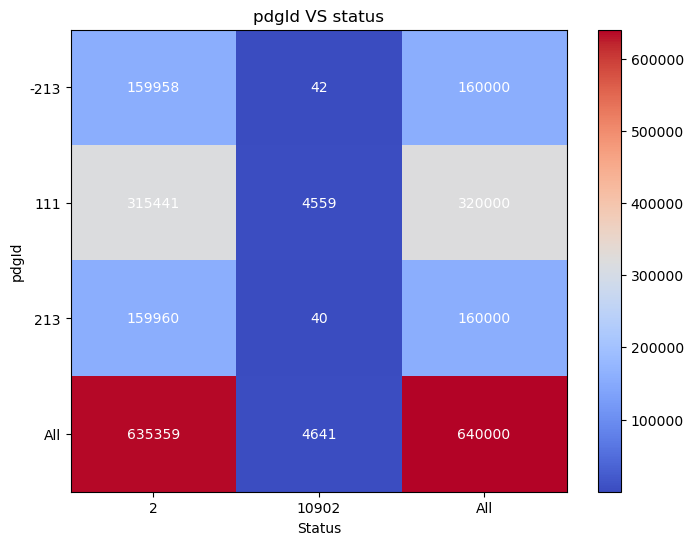

In [46]:
# import seaborn as sns
ct_margins = pd.crosstab(pdgVSstatus_df['pdgId'], pdgVSstatus_df['status'], margins=True)
# sns.heatmap(ct_margins, cmap='coolwarm', annot=True)
# DOES NOT FILL ALL CELLS WITH COUNTS

plt.figure(figsize=(8, 6))
plt.imshow(ct_margins, cmap='coolwarm', interpolation='nearest', aspect="auto")

# Add annotations
for i in range(len(ct_margins)):
    for j in range(len(ct_margins.columns)):
        plt.text(j,
                 i,
                 ct_margins.iloc[i, j],
                 ha='center',
                 va='center',
                 color='white')

# Add axis labels
plt.xticks(range(len(ct_margins.columns)), ct_margins.columns)
plt.yticks(range(len(ct_margins)), ct_margins.index)

# Add color bar
plt.colorbar()

# Add title and labels
plt.title('pdgId VS status')
plt.xlabel('Status')
plt.ylabel('pdgId')

# Show the plot
plt.show()

<div class="alert alert-block alert-info">
    
`pdgId` values are referred to $\rho^-, \pi^0, \rho^+$ for -213, 111 and 213, respectively.
    
`status` values mean decayed (2) or **??? (10902)**
    
The generated events (single collisions) generate $\rho^{\pm}, \pi^0$ phenomena, that decay almost instantaneously. 
    
    **What happens for the 4k+ particles with status=10902???**

### truth quantities

In [47]:
exploding_cols = [
    "truthPartPt",
    "truthPartE",
    "truthPartMass",
    "truthPartEta",
    "truthPartPhi",
]
truth_df = events_casted[["eventNumber"] +
                         exploding_cols].explode(exploding_cols)

truth_df

,eventNumber,truthPartPt,truthPartE,truthPartMass,truthPartEta,truthPartPhi
0,3220116,110.437523,297.475677,0.0,-1.647515,-3.112333
0,3220116,102.188751,272.174866,0.134977,-1.635505,-3.115794
1,3221919,472.855011,593.925293,0.0,0.701103,2.455705
1,3221919,154.674866,195.463577,0.134977,0.711151,2.446985
2,3221342,30.445354,30.798634,0.0,-0.039552,-1.265297
...,...,...,...,...,...,...
319997,4676250,425.526398,462.083221,0.134977,-0.411599,-2.709352
319998,4677304,908.977966,1227.907715,0.0,-0.814946,2.03907
319998,4677304,759.328796,1024.386719,0.134977,-0.812972,2.039516
319999,4677261,448.792877,449.518738,0.0,0.056773,-1.634781


In [48]:
truth_df[["truthPartMass"]].value_counts(),truth_df[["truthPartMass"]].value_counts().index

(truthPartMass
 0.000000         320000
 0.134977         312831
 0.134977           7169
 Name: count, dtype: int64,
 MultiIndex([(               0.0,),
             (0.1349765956401825,),
             (0.1349766105413437,)],
            names=['truthPartMass']))

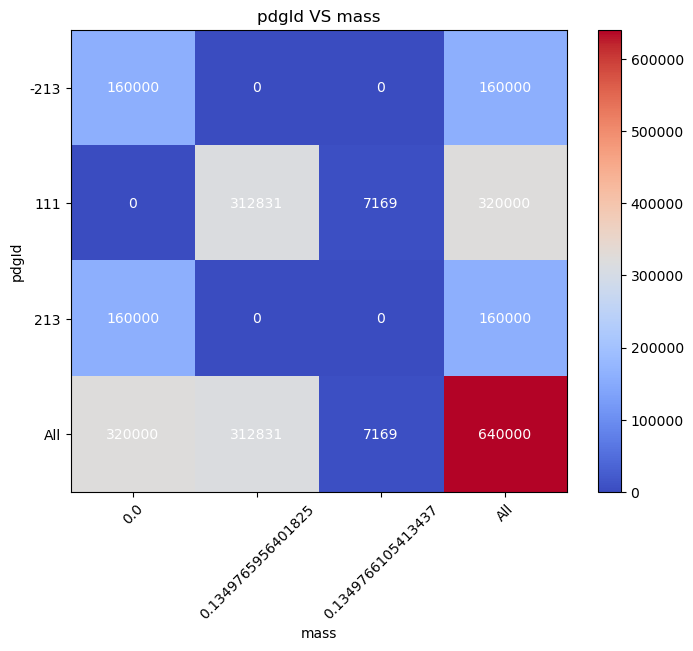

In [49]:
exploding_cols = ["pdgId", "truthPartMass"]
pdfVSmass = events_casted[["eventNumber"] +
                               exploding_cols].explode(exploding_cols)
pdfVSmass = pdfVSmass.set_index("eventNumber")
pdfVSmass

# import seaborn as sns
ct_margins = pd.crosstab(pdfVSmass['pdgId'], pdfVSmass['truthPartMass'], margins=True)
# sns.heatmap(ct_margins, cmap='coolwarm', annot=True)
# DOES NOT FILL ALL CELLS WITH COUNTS

plt.figure(figsize=(8, 6))
plt.imshow(ct_margins, cmap='coolwarm', interpolation='nearest', aspect="auto")

# Add annotations
for i in range(len(ct_margins)):
    for j in range(len(ct_margins.columns)):
        plt.text(j,
                 i,
                 ct_margins.iloc[i, j],
                 ha='center',
                 va='center',
                 color='white')

# Add axis labels
plt.xticks(range(len(ct_margins.columns)), ct_margins.columns.round(4), rotation=45)
plt.yticks(range(len(ct_margins)), ct_margins.index)
plt.ylabel(ct_margins.index.round(2))#, rot=45)

# Add color bar
plt.colorbar()

# Add title and labels
plt.title('pdgId VS mass')
plt.xlabel('mass')
plt.ylabel('pdgId')

# Show the plot
plt.show()


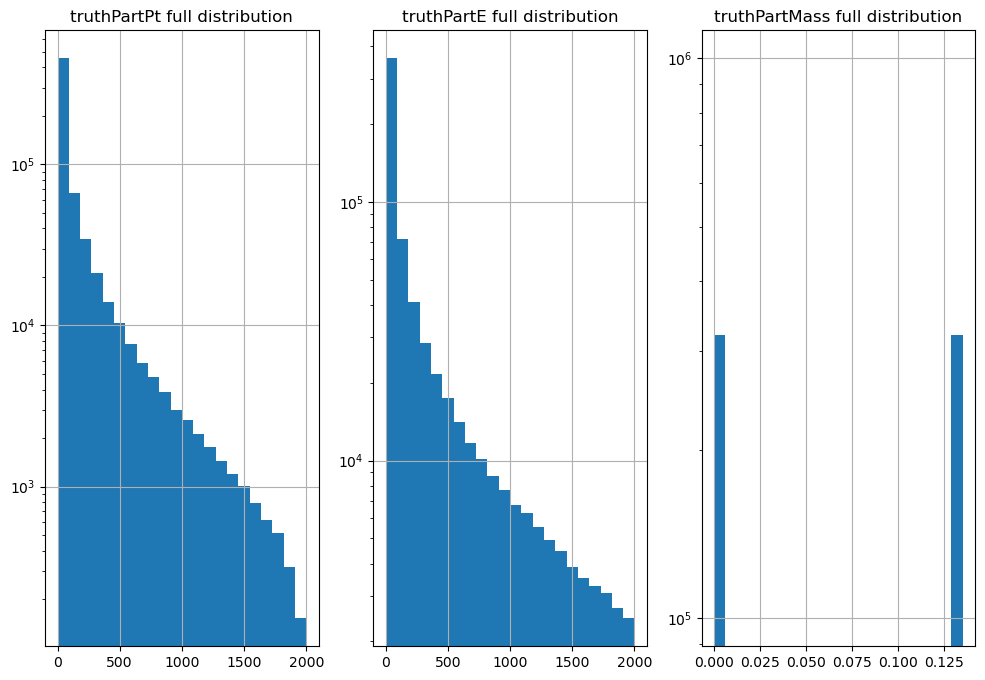

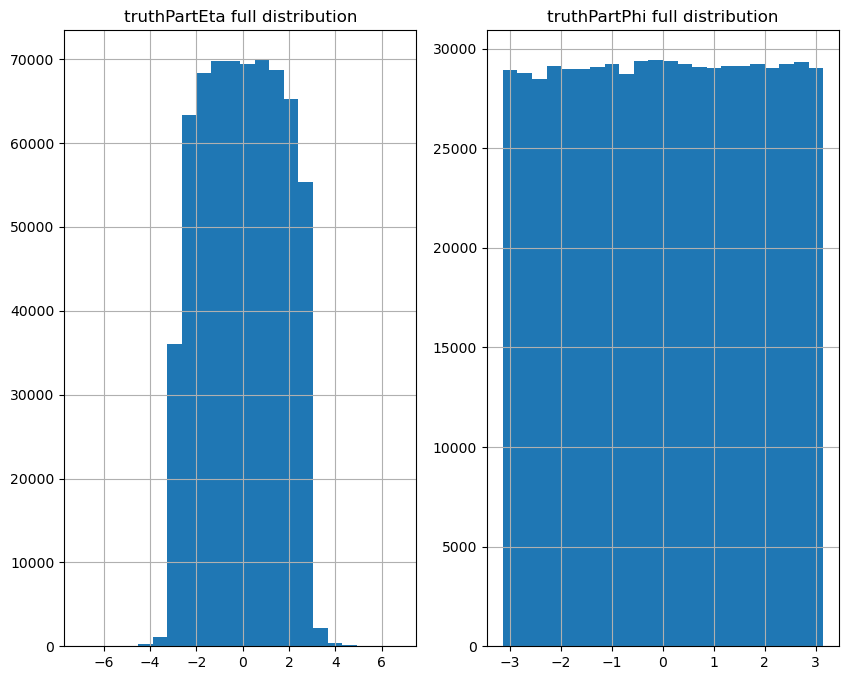

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(12, 8))

for i, c in enumerate(truth_df.columns[1:4]):
    _ = truth_df[c].hist(bins=22, ax=axes[i], log=True)
    axes[i].set_title(f"{c} full distribution")
#     plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10, 8))
for i, c in enumerate(truth_df.columns[4:]):
    _ = truth_df[c].hist(bins=22, ax=axes[i])
    axes[i].set_title(f"{c} full distribution")

plt.show()

### track observables

In [51]:
exploding_cols = [
    "trackPt",
    "trackP",
    "trackMass",
    "trackEta",
    "trackPhi",
    "trackD0",
    "trackZ0",
]
track_df = events_casted[["eventNumber"] +
                         exploding_cols].explode(exploding_cols)
track_df

,eventNumber,trackPt,trackP,trackMass,trackEta,trackPhi,trackD0,trackZ0
0,3220116,8.092719,24.807055,0.139698,-1.785575,-3.068999,-0.00268,61.615356
1,3221919,326.727936,409.156281,0.100568,0.696185,2.459937,-0.012303,10.345993
2,3221342,9.670117,9.713913,0.139572,-0.095136,-1.476077,-0.012635,8.548205
3,3220180,25.168373,101.802826,0.142912,-2.074954,1.472256,-0.026323,-6.245691
4,3220742,43.914696,55.416771,0.139214,0.708833,-2.62745,0.023521,-22.891508
...,...,...,...,...,...,...,...,...
319996,4677589,1.163543,6.279166,0.139561,-2.370218,1.011632,0.023124,14.134147
319996,4677589,8.715794,22.720484,0.139562,-1.612274,1.009167,3.326516,16.724018
319997,4676250,47.194344,51.593082,0.139405,-0.428467,-2.691937,-0.012229,32.953281
319998,4677304,126.259216,171.742706,0.138546,-0.825196,2.036646,0.004071,73.96022


#### Histogram attempts

In [52]:
pt_tracks = track_df[["trackPt"]].value_counts()
pt_tracks

#.hist(bins=100)

trackPt     
2.118823e+00    2
7.516787e+00    2
1.387818e+01    2
4.445907e+00    2
2.023260e+00    2
               ..
4.923626e+00    1
4.923576e+00    1
4.923570e+00    1
4.923411e+00    1
6.078295e+06    1
Name: count, Length: 313181, dtype: int64

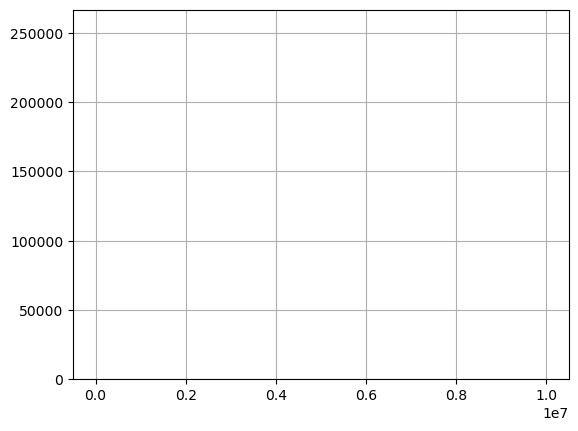

In [53]:
x = track_df["trackPt"].hist(bins=[-6, 0, 100, 200, 300, 500, 800, 1200, 2000, 3000, 4000, 5000, 10e6])


In [54]:
bins= np.array([0, 100, 200, 300, 500, 800, 1200, 2000, 3000, 4000, 5000, 10e6])
np.append(-bins[::-1], bins[1:])

array([-1.0e+07, -5.0e+03, -4.0e+03, -3.0e+03, -2.0e+03, -1.2e+03,
       -8.0e+02, -5.0e+02, -3.0e+02, -2.0e+02, -1.0e+02, -0.0e+00,
        1.0e+02,  2.0e+02,  3.0e+02,  5.0e+02,  8.0e+02,  1.2e+03,
        2.0e+03,  3.0e+03,  4.0e+03,  5.0e+03,  1.0e+07])

In [55]:
bins= np.array([0, 100, 200, 300, 500, 800, 1200, 2000, 3000, 4000, 5000, 10e6])
symmetric_bins = np.append(-bins[::-1], bins[1:])

pd.cut(track_df["trackPt"], symmetric_bins).value_counts().sort_index()

trackPt
(-10000000.0, -5000.0]     54728
(-5000.0, -4000.0]         24182
(-4000.0, -3000.0]          7872
(-3000.0, -2000.0]          2008
(-2000.0, -1200.0]           413
(-1200.0, -800.0]             73
(-800.0, -500.0]              15
(-500.0, -300.0]               1
(-300.0, -200.0]               0
(-200.0, -100.0]               0
(-100.0, -0.0]                 0
(-0.0, 100.0]             178524
(100.0, 200.0]             19237
(200.0, 300.0]              9240
(300.0, 500.0]              8523
(500.0, 800.0]              4884
(800.0, 1200.0]             2185
(1200.0, 2000.0]            1089
(2000.0, 3000.0]             331
(3000.0, 4000.0]             119
(4000.0, 5000.0]              68
(5000.0, 10000000.0]         271
Name: count, dtype: int64

In [56]:
start = 5
track_df[(start < track_df.trackPt) & (track_df.trackPt < start+1)]

,eventNumber,trackPt,trackP,trackMass,trackEta,trackPhi,trackD0,trackZ0
52,3221053,5.629271,24.977919,0.139633,2.170213,-1.139867,0.044215,55.949661
61,3220522,5.822482,7.835567,0.13956,-0.80929,0.318724,-0.004116,54.044399
101,3220621,5.065665,8.004439,0.139569,-1.030899,-1.811609,-0.04229,69.905632
118,3220228,5.65247,24.062439,0.139678,-2.127617,0.374698,0.005806,24.004839
130,3221859,5.592711,10.017046,0.139604,-1.186936,2.038958,0.020808,-26.633081
...,...,...,...,...,...,...,...,...
319934,4676287,5.991778,6.589295,0.139575,0.442963,2.35138,0.009208,26.019894
319936,4676271,5.347798,5.899614,0.139562,-0.450463,-1.035651,0.015167,-38.348999
319948,4677936,5.219977,19.660748,0.139431,-2.00117,-2.469432,-0.158474,-72.128258
319955,4677858,5.682001,6.801043,0.139575,-0.617738,0.43749,0.00684,17.309216


<Axes: >

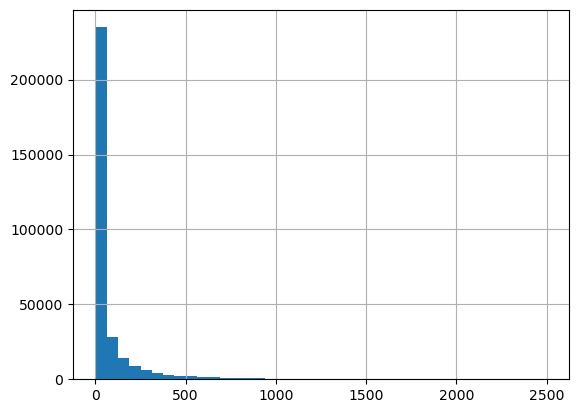

In [57]:
cutoff = 2500
track_df.trackPt[track_df.trackPt<cutoff].hist(bins=40)

<Axes: >

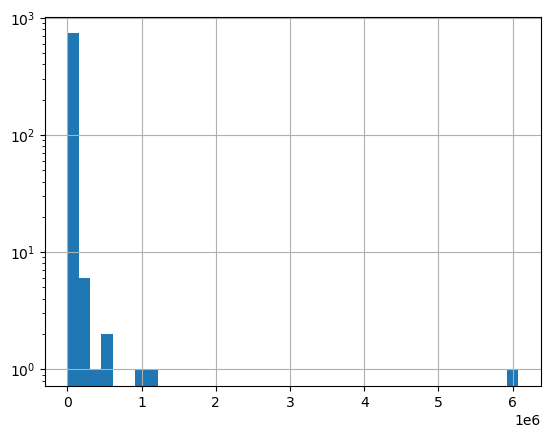

In [58]:
track_df.trackPt[track_df.trackPt>cutoff].hist(bins=40,log=True)

In [59]:
track_df["trackPt"].min()#describe(percentiles=[0, .1, .25, .5, .75, .9, 1])

0.5000382661819458

In [60]:
shifted_bins = np.append(bins - 10e8, bins[1:])

pd.cut(track_df["trackPt"], shifted_bins).value_counts().sort_index()

trackPt
(-1000000000.0, -999999900.0]     54728
(-999999900.0, -999999800.0]      24182
(-999999800.0, -999999700.0]       7872
(-999999700.0, -999999500.0]       2008
(-999999500.0, -999999200.0]        413
(-999999200.0, -999998800.0]         73
(-999998800.0, -999998000.0]         15
(-999998000.0, -999997000.0]          1
(-999997000.0, -999996000.0]          0
(-999996000.0, -999995000.0]          0
(-999995000.0, -990000000.0]          0
(-990000000.0, 100.0]            178524
(100.0, 200.0]                    19237
(200.0, 300.0]                     9240
(300.0, 500.0]                     8523
(500.0, 800.0]                     4884
(800.0, 1200.0]                    2185
(1200.0, 2000.0]                   1089
(2000.0, 3000.0]                    331
(3000.0, 4000.0]                    119
(4000.0, 5000.0]                     68
(5000.0, 10000000.0]                271
Name: count, dtype: int64

In [61]:
pd.cut(track_df["trackPt"], 5000).value_counts().sort_index()

trackPt
(-6077.794, 1216.159]         311918
(1216.159, 2431.818]            1229
(2431.818, 3647.477]             238
(3647.477, 4863.136]              97
(4863.136, 6078.795]              51
                               ...  
(6072216.706, 6073432.364]         0
(6073432.364, 6074648.023]         0
(6074648.023, 6075863.682]         0
(6075863.682, 6077079.341]         0
(6077079.341, 6078295.0]           1
Name: count, Length: 5000, dtype: int64

#### Plots

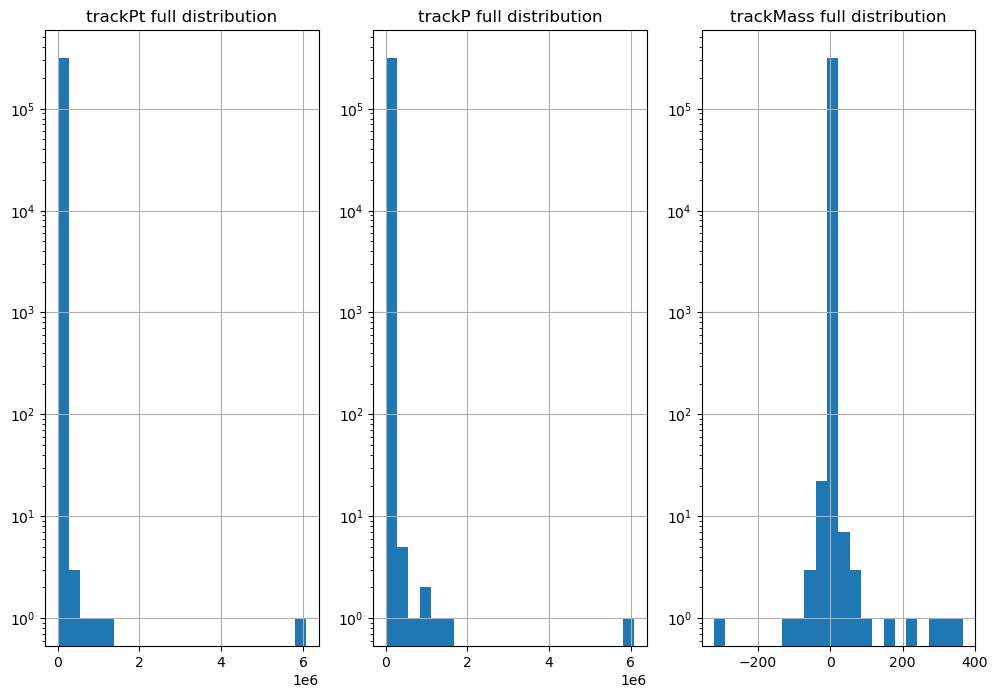

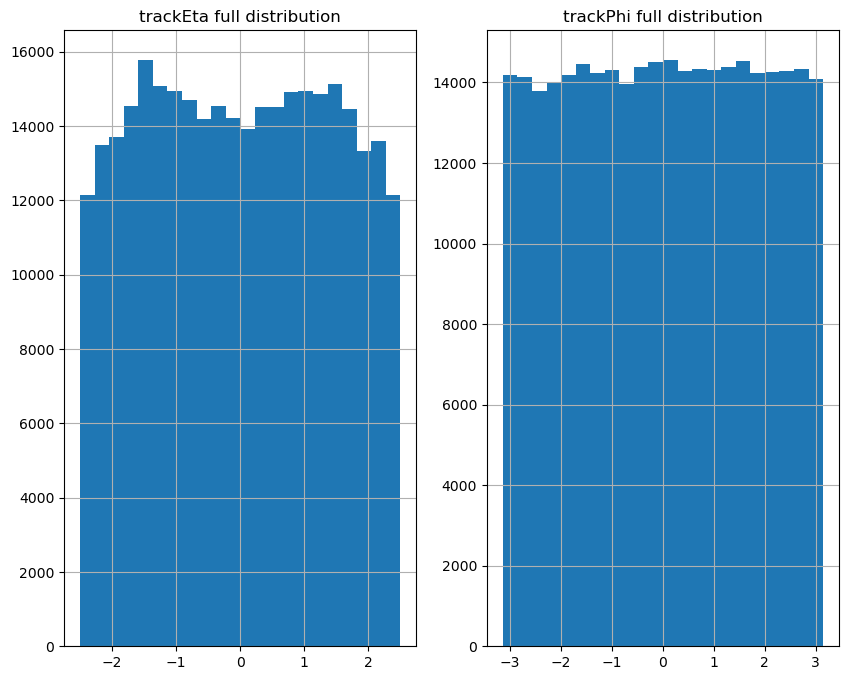

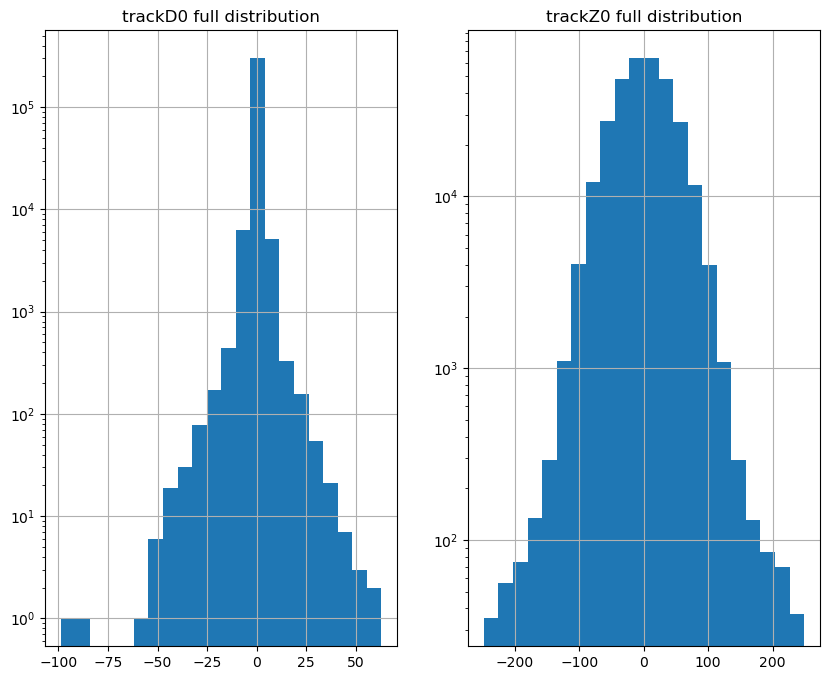

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(12, 8))

for i, c in enumerate(track_df.columns[1:4]):
    _ = track_df[c].hist(bins=22, ax=axes[i], log=True)
    axes[i].set_title(f"{c} full distribution")
#     plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10, 8))
for i, c in enumerate(track_df.columns[4:6]):
    _ = track_df[c].hist(bins=22, ax=axes[i])
    axes[i].set_title(f"{c} full distribution")
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(10, 8))
for i, c in enumerate(track_df.columns[6:]):
    _ = track_df[c].hist(bins=22, ax=axes[i], log=True)
    axes[i].set_title(f"{c} full distribution")
plt.show()

In [63]:
# outliers? --> it doesn't seem like so
track_df[track_df.trackD0<-50]

,eventNumber,trackPt,trackP,trackMass,trackEta,trackPhi,trackD0,trackZ0
43679,3263574,1.074308,3.320223,0.139568,-1.794237,-1.458287,-61.221024,-141.169388
105072,3375390,1.810281,5.295637,0.139568,-1.735964,-0.445695,-98.585693,91.825554
242604,4573190,2.518679,4.117865,0.13957,1.074447,1.708826,-54.212914,-60.786808
289358,4646231,1.412913,3.840195,0.139569,-1.657314,-0.739984,-86.647896,-19.996992


<Axes: >

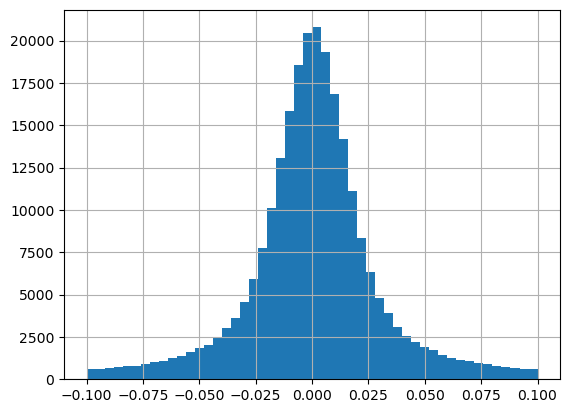

In [64]:
track_df.trackD0[(track_df.trackD0>-0.1) & (track_df.trackD0<.1)].hist(bins=50)

<Axes: >

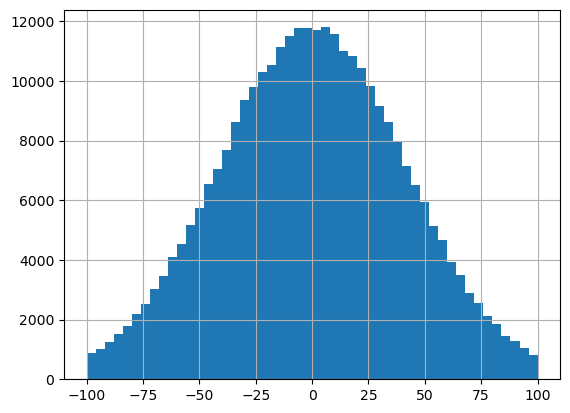

In [65]:
track_df.trackZ0[(track_df.trackZ0>-100) & (track_df.trackZ0<100)].hist(bins=50)

<div class="alert alert-block alert-info">
    
D0 refers to distance from PV in $\phi$ plane projection (vertical, above/below beam). This is narrower since it depends on how well I can squeeze the particles with my EM field (kind of resolution).
    
Z0 refers to distance from PV in $\eta$ plane projection (longitudinal, forward/backward). This is wider since I can't control where two particles will cross along the beam pipe.
    

</div>

### cluster observables

In [66]:
exploding_cols = [
"clusterE",
"clusterPt",
"clusterEta",
"clusterPhi",
"cluster_nCells",
"cluster_sumCellE"
]
cluster_df = events_casted[["eventNumber"] +
                         exploding_cols].explode(exploding_cols)

cluster_df

,eventNumber,clusterE,clusterPt,clusterEta,clusterPhi,cluster_nCells,cluster_sumCellE
0,3220116,NaN,NaN,NaN,NaN,NaN,NaN
1,3221919,216.183502,173.439987,0.688389,2.468356,210,216.183426
1,3221919,12.907271,10.531498,0.659669,2.402533,130,12.907276
2,3221342,17.463947,17.462889,-0.011014,-1.160346,111,17.463947
2,3221342,2.635048,2.619319,-0.109534,-1.419117,36,2.635048
...,...,...,...,...,...,...,...
319997,4676250,22.876318,21.011597,-0.418246,-2.674932,227,22.87631
319998,4677304,1.80041,1.474689,-0.652979,1.850456,26,1.80041
319999,4677261,392.307678,391.964569,0.04184,-1.627777,244,392.307617
319999,4677261,1.663972,1.636266,0.183767,-1.62643,38,1.663972


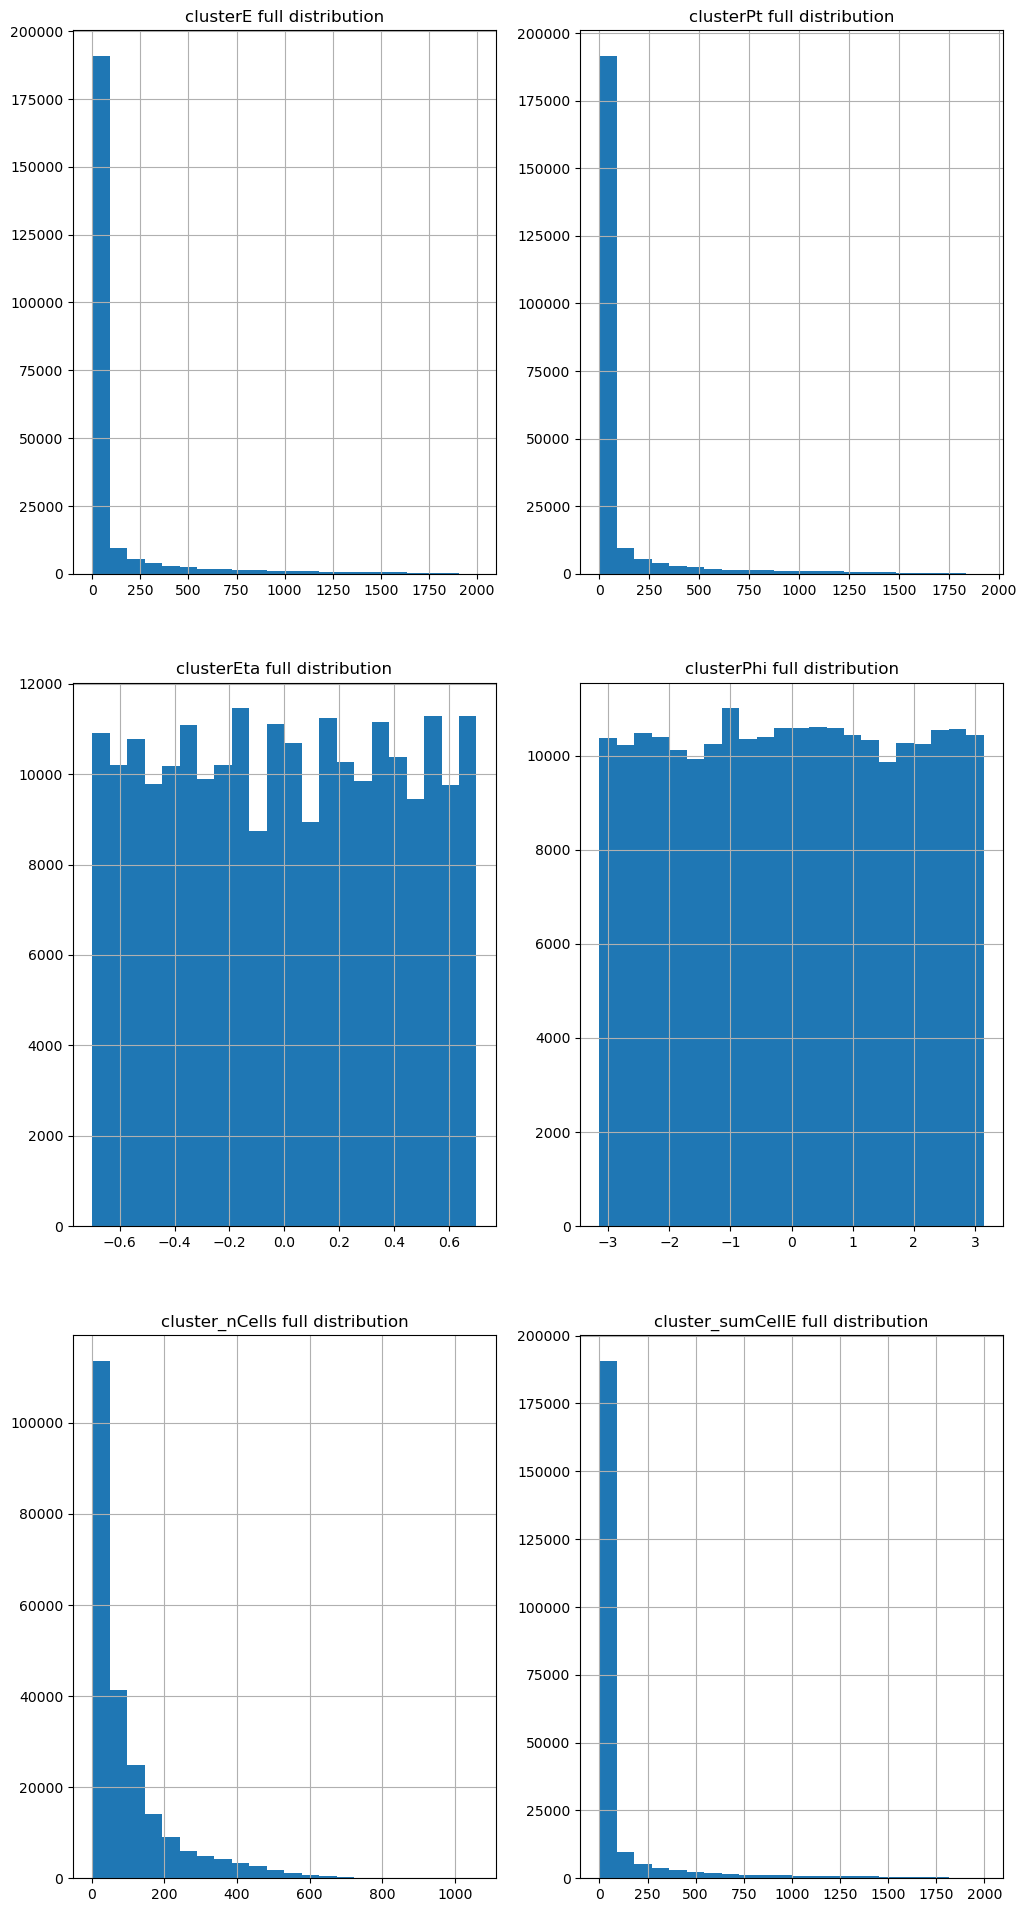

In [67]:
fig, axes = plt.subplots(3, 2, figsize=(12, 24))
axes = axes.flatten()
for i, c in enumerate(cluster_df.columns[1:]):
    _ = cluster_df[c].hist(bins=22, ax=axes[i])#, log=True)
    axes[i].set_title(f"{c} full distribution")
#     plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
plt.show()

# fig, axes = plt.subplots(1, 2, figsize=(10, 8))
# for i, c in enumerate(cluster_df.columns[3:5]):
#     _ = cluster_df[c].hist(bins=22, ax=axes[i])
#     axes[i].set_title(f"{c} full distribution")
# plt.show()


# fig, axes = plt.subplots(1, 2, figsize=(10, 8))
# for i, c in enumerate(cluster_df.columns[5:]):
#     _ = cluster_df[c].hist(bins=22, ax=axes[i])
#     axes[i].set_title(f"{c} full distribution")
# plt.show()

Text(0.5, 1.0, 'clusterEta')

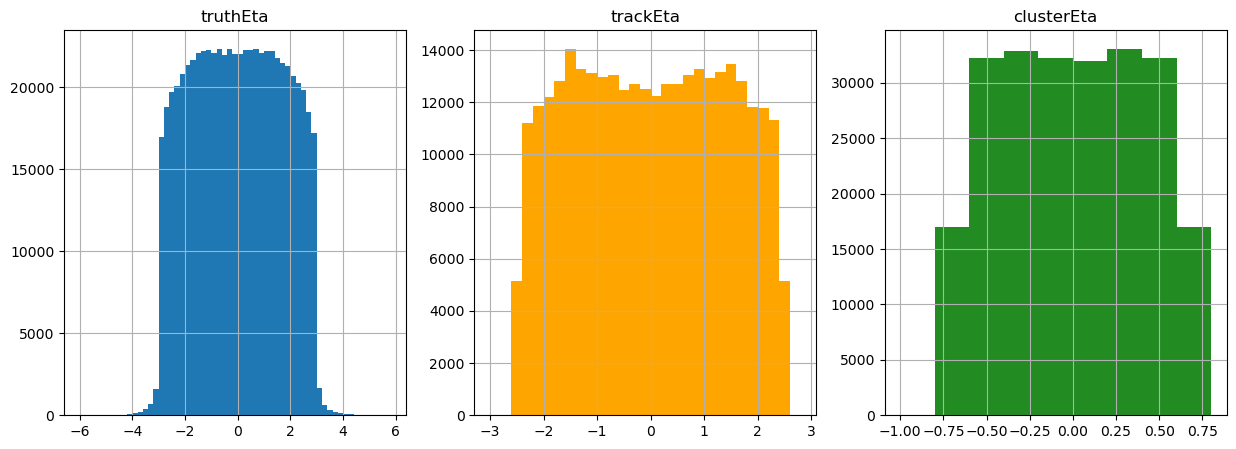

In [68]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

_ = truth_df.truthPartEta.hist(bins=np.arange(-6,6, 6/30), ax=ax[0])
ax[0].set_title("truthEta")
_ = track_df.trackEta.hist(bins=np.arange(-3,3, 6/30), ax=ax[1], color="orange")
ax[1].set_title("trackEta")
_ = cluster_df.clusterEta.hist(bins=np.arange(-1, 1, 6/30), ax=ax[2], color="forestgreen")
ax[2].set_title("clusterEta")